In [325]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')
import itertools
%matplotlib inline

In [326]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#to view large outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [327]:
# Reading Application Data
app_df= pd.read_csv('application_data.csv')
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loans           F           

In [328]:
# Check the number of rows and columns in the dataframe
app_df.shape

(307511, 122)

In [329]:
# Check the summary for the numeric columns 
app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555       0.502130  5.143927e-01       0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894       0.066333              0.100775        0.107399                 0.008809           0.028358         0.114231           0.087543                      0.977065          0.759637         0.042553        0.074490   
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419      11.944812       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817       0.211062  1.910602e-01       0.194844         0.10824          0.082438                     0.059223         0.113280        0.076036       0.134576       0.100049       0.144641       0.161380       0.081184              0.092576        0.110565                 0.047732           0.069523         0.107936           0.084307                      0.064575          0.110111         0.074445        0.132256   
min    100002.000000       0.000000       0.000000      2.

In [330]:
#checking for percentage of null values in the dataframe application_data.csv
(app_df.isnull().sum()/ len(app_df) *100).sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [331]:
# dropping the columns with null-values more than 35%.
app_df = app_df.loc[:, app_df.isnull().mean()<=0.35]

In [332]:
# Checking again the number of rows and columns in the dataframe
app_df.shape

(307511, 73)

In [333]:
# checking again the percentage of the null values below 35%
(app_df.isnull().sum()/len(app_df)*100).sort_values(ascending = False).round(2)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
AMT_ANNUITY                     0.00
CNT_FAM_MEMBERS                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
NAME_INCOME_TYPE                0.00
FLAG_OWN_REALTY                 0.00
TARGET                          0.00
FLAG_EMAIL                      0.00
FLAG_PHONE                      0.00
FLAG_CONT_MOBILE                0.00
NAME_CONTRACT_TYPE              0.00
FLAG_WORK_PHONE                 0.00
FLAG_EMP_PHONE                  0.00
F

In [334]:
# inspecting the column types if they are in correct data type using the above result.
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

 ## Data Cleaning and Imputation.

In [335]:
#Analysis of the column 'ORGANIZATION_TYPE' in application 
app_df['ORGANIZATION_TYPE'].value_counts(dropna=False)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

##### Since there are huge number of values with 'XNA' so imputing them would effect the analysis. Hence keeping them as it is.

In [336]:
#Analysis of the column 'OCCUPATION_TYPE' in application dataset
app_df['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [337]:
app_df.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

##### Since the OCCUPATION_TYPE column contains large number of null values . Hence it would be inappropiate to fill the missing values with mode value. So creating another category as 'Unknown'

In [338]:
#Coverting "Occupation_Type" into Categorical for adding a new category "Unknown"
app_df.OCCUPATION_TYPE=pd.Categorical(app_df.OCCUPATION_TYPE)
app_df['OCCUPATION_TYPE'] = app_df['OCCUPATION_TYPE'].cat.add_categories('Unknown')
app_df['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

In [339]:
# Validate the above operation
app_df['OCCUPATION_TYPE'].value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [340]:
# Analysis of the column 'NAME_TYPE_SUITE' in application dataset
print("Number of Null Values :",app_df.NAME_TYPE_SUITE.isnull().sum())
print("\n")
print(app_df.NAME_TYPE_SUITE.value_counts())

Number of Null Values : 1292


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


In [341]:
#checking the mode.
app_df['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
dtype: object

##### Missing values in Categorical variables "NAME_TYPE_SUITE" can be replaced with the mode value as 'Unaccompanied

In [342]:
app_df['NAME_TYPE_SUITE'].fillna((app_df['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

In [343]:
#Analysis of null values for the following column.
app_df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
dtype: int64

In [344]:
# Check the summary of above columns.
app_df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE
count             306490.000000             306490.000000             306490.000000             306490.000000
mean                   1.422245                  0.143421                  0.100049                  1.405292
std                    2.400989                  0.446698                  0.362291                  2.379803
min                    0.000000                  0.000000                  0.000000                  0.000000
25%                    0.000000                  0.000000                  0.000000                  0.000000
50%                    0.000000                  0.000000                  0.000000                  0.000000
75%                    2.000000                  0.000000                  0.000000                  2.000000
max                  348.000000                 34.000000                 24.000000                344.000000

In [345]:
# Checking the median
app_df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].median()

OBS_30_CNT_SOCIAL_CIRCLE    0.0
DEF_30_CNT_SOCIAL_CIRCLE    0.0
DEF_60_CNT_SOCIAL_CIRCLE    0.0
OBS_60_CNT_SOCIAL_CIRCLE    0.0
dtype: float64

In [346]:
# Imputing all the above columns with median
app_df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']]=app_df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].fillna(app_df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].median())

In [347]:
# Validate the above operation
app_df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [348]:
#Analysis of null values for the following column.
app_df[['EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_2      660
EXT_SOURCE_3    60965
dtype: int64

In [349]:
# Check the summary of above columns.
app_df[['EXT_SOURCE_2','EXT_SOURCE_3']].describe()

EXT_SOURCE_2   EXT_SOURCE_3
count  3.068510e+05  246546.000000
mean   5.143927e-01       0.510853
std    1.910602e-01       0.194844
min    8.173617e-08       0.000527
25%    3.924574e-01       0.370650
50%    5.659614e-01       0.535276
75%    6.636171e-01       0.669057
max    8.549997e-01       0.896010

In [350]:
# Checking the median
app_df[['EXT_SOURCE_2','EXT_SOURCE_3']].median()

EXT_SOURCE_2    0.565961
EXT_SOURCE_3    0.535276
dtype: float64

In [351]:
# Imputing all the above columns with median
app_df[['EXT_SOURCE_2','EXT_SOURCE_3']]=app_df[['EXT_SOURCE_2','EXT_SOURCE_3']].fillna(app_df[['EXT_SOURCE_2','EXT_SOURCE_3']].median())

In [352]:
# Validate the above operation
app_df[['EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_2    0
EXT_SOURCE_3    0
dtype: int64

In [353]:
#Analysis of null values for the following column.
app_df[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_HOUR']].isnull().sum()

AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
dtype: int64

In [354]:
# Check the summary of above columns.
app_df[['AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR',
        'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_HOUR
count              265992.000000               265992.000000              265992.000000              265992.000000               265992.000000               265992.000000
mean                    0.007000                    0.034362                   0.267395                   0.265474                    1.899974                    0.006402
std                     0.110757                    0.204685                   0.916002                   0.794056                    1.869295                    0.083849
min                     0.000000                    0.000000                   0.000000                   0.000000                    0.000000                    0.000000
25%                     0.000000                    0.000000                   0.000000                   0.000000                    0.000000                    0.000000
50%                     0.000000                    0.000000                   0.000000                   0.000000                    1.000000                    0.000000
75%                     0.000000                    0.000000                   0.000000                   0.000000                    3.000000                    0.000000
max                     9.000000                    8.000000                  27.000000                 261.000000                   25.000000                    4.000000

In [355]:
# Imputing all the above columns with median
app_df[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_HOUR']]=app_df[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_HOUR']].fillna(0)

In [356]:
# Validate the above operation
app_df[['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_HOUR']].isnull().sum()

AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_HOUR    0
dtype: int64

In [357]:
# Analysis of "CNT_FAM_MEMBERS"
app_df["CNT_FAM_MEMBERS"].isnull().sum()

2

In [358]:
# Check the summary of above columns.
app_df.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [359]:
# Imputing the above columns with median
app_df.CNT_FAM_MEMBERS = app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.median())

##### from the describe() it is evident that there is a huge difference between 75% and max.

In [360]:
# Validate the above operation
app_df["CNT_FAM_MEMBERS"].isnull().sum()

0

In [361]:
#Analysis of "CODE_GENDER" column.
app_df['CODE_GENDER'].value_counts(dropna=False)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

##### We can see that Female(F) is having the majority and only 4 rows are having XNA values.So, there won't be any major impact in the dataset,if we update those rows with Gender 'F'.

In [362]:
# Replacing XNA with F
app_df.loc[app_df['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [363]:
# Validate the above operation
app_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

## Identifying The Outliers

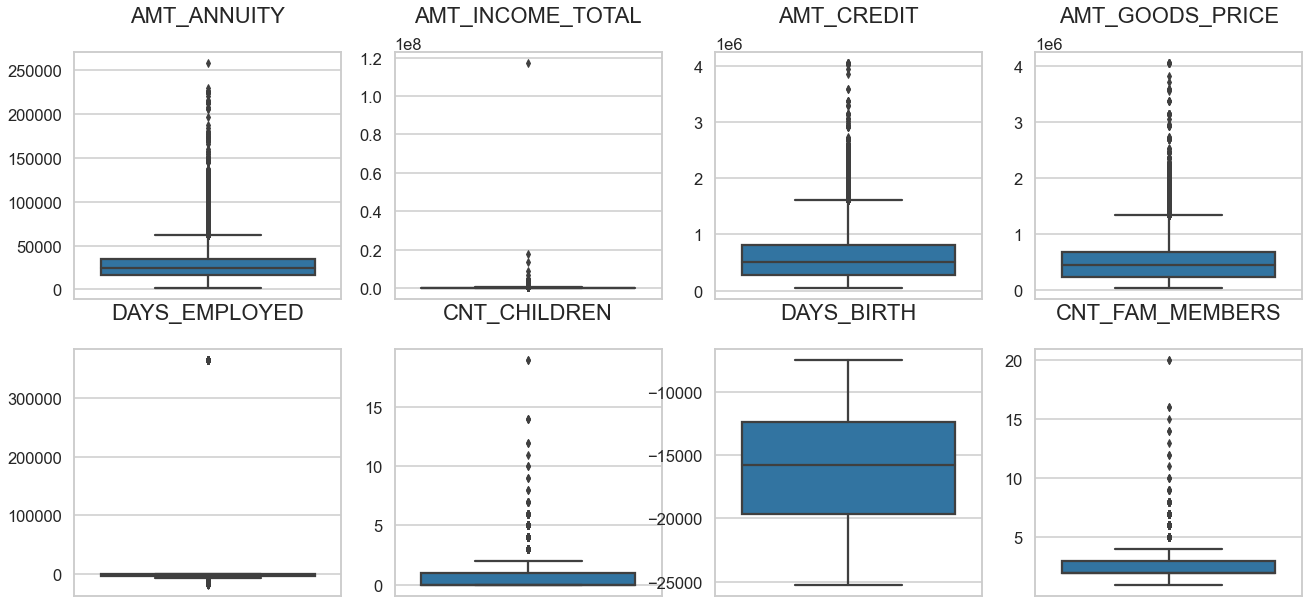

In [364]:
#Analysis of Outliers for the following column.
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH','CNT_FAM_MEMBERS']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=app_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=app_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

#### Inferences:
- AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN has outliers.
- DAYS_EMPLOYED has outliers above 350000~ 958 year which pratically impossible.Hence we can conclude the data is inaccurate.
- DAYS_BIRTH box plot it is evident that it has no outliers.
- AMT_INCOME_TOTAL has few outliers which indicate that few applicants has more income range as compared to others.
- CNT_FAM_MEMBERS has few ouliers which indicate that few applicant has more number of family members as compared to others.

## Binning Numerical Columns to create a categorical column

In [365]:
# Creating bins for "AMT_INCOME_TOTAL"
slots = ['0-50000','50000-100000','100000-150000', '150000-200000','200000-250000','250000-300000',
        '300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
app_df['AMT_INCOME_RANGE']=pd.cut(app_df['AMT_INCOME_TOTAL'],bins,labels=slots)

In [366]:
#checking the binning of data and % of data in each category
app_df['AMT_INCOME_RANGE'].value_counts(normalize=True,ascending = True)*100

450000-500000        0.142109
500000 and above     0.878668
0-50000              1.468891
400000-450000        1.601244
350000-400000        1.886762
300000-350000        2.885750
250000-300000        5.540940
200000-250000       15.653749
50000-100000        19.245165
150000-200000       20.912097
100000-150000       29.784626
Name: AMT_INCOME_RANGE, dtype: float64

##### From the above binning we can clearly conclude that :
- More than 50% of applicants have income amount in the range of 100K-200K.
- Only 0.88% of applicants have income amount above 500000

In [367]:
# Creating bins for "AMT_CREDIT"
slots = ['0-50000','50000-100000','100000-150000', '150000-200000','200000-250000','250000-300000',
        '300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
app_df['AMT_CREDIT_RANGE']=pd.cut(app_df['AMT_CREDIT'],bins,labels=slots)

In [368]:
#checking the binning of data and % of data in each category
app_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

500000 and above    51.438160
250000-300000       10.327761
200000-250000        7.496968
400000-450000        5.931170
150000-200000        5.848571
300000-350000        5.269730
450000-500000        4.487319
100000-150000        3.952704
350000-400000        3.295167
50000-100000         1.770018
0-50000              0.182432
Name: AMT_CREDIT_RANGE, dtype: float64

##### From this binning we can conculde that :
- More Than 50% of applicants have taken loan amounts more than "500000 and above".
- Only 0.18% of applicants have taken loan amount below 50000.

In [369]:
# Creating bins for Age
app_df['DAYS_BIRTH']=abs(app_df['DAYS_BIRTH'])
app_df['AGE'] = app_df['DAYS_BIRTH'] //365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

app_df['AGE_GROUP']=pd.cut(app_df['AGE'],bins=bins,labels=slots)

In [370]:
#checking the binning of data and % of data in each category
app_df['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

##### From above binning it is clear that 31% of the loan applicants are of the age above 50 

In [371]:
# Creating bins for Employement Time
app_df['DAYS_EMPLOYED'] = abs(app_df['DAYS_EMPLOYED'])
app_df['YEARS_EMPLOYED'] = app_df['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

app_df['EMPLOYMENT_YEAR']=pd.cut(app_df['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [372]:
#checking the binning of data and % of data in each category
app_df['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
60 above     0.000000
50-60        0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

##### From this binning it is clear that more than 55% of the loan applicants have work experience within 0-5 years

In [373]:
# Checking the number of unique values each column possess to identify categorical columns
app_df.nunique().sort_values(ascending=False)

SK_ID_CURR                     307511
EXT_SOURCE_2                   119831
DAYS_BIRTH                      17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13672
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
EXT_SOURCE_3                      814
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
YEARS_EMPLOYED                     51
AGE                                50
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
HOUR_APPR_PROCESS_START            24
AMT_REQ_CREDIT_BUREAU_MON          24
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
AMT_REQ_CREDIT_BUREAU_QRT          11
AMT_INCOME_RANGE                   11
AMT_CREDIT_R

## Datatype Conversion

In [374]:
# Check the column-wise info of the dataframe
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [375]:
#Conversion of Object and Numerical columns to Categorical Columns
columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in columns:
    app_df[col] =pd.Categorical(app_df[col])

##### Numeric columns are already in int64 and float64 format. Hence proceeding with other columns.

In [376]:
# Validate the above operation
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [377]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0 = app_df.loc[app_df["TARGET"]==0]# Non Defaulters
target1 = app_df.loc[app_df["TARGET"]==1] # Defaulter

In [378]:
# Calculating Imbalance ratio
ratio = round(len(target0)/len(target1),2)
print("Imbalance ratio from Defaulters to non Defaulters is :",ratio)

Imbalance ratio from Defaulters to non Defaulters is : 11.39


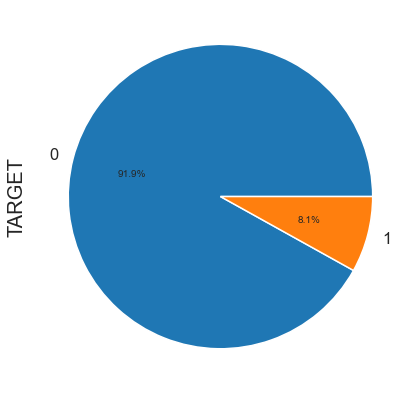

In [379]:
# Vizualising the percentage of Defaulters vs Non Defaulters in the dataset.
# "1" indicates Defaulters and "0" indicates non defaulters.
plt.figure(figsize=[10,7])
app_df.TARGET.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

# UNIVARIATE ANALYSIS

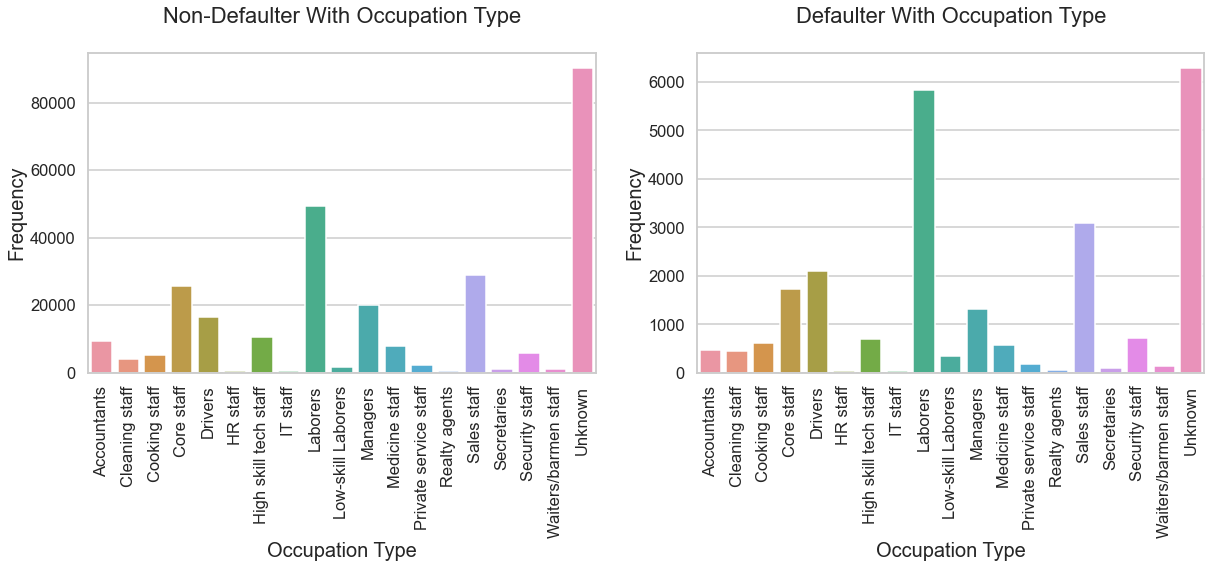

In [380]:
# plotting "Occuption Type" on the basis of defaulter and Non defaulter
plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
sns.countplot(target0['OCCUPATION_TYPE'])
plt.xlabel("Occupation Type")
plt.ylabel("Frequency")
plt.title("Non-Defaulter With Occupation Type") 
plt.xticks(rotation=90)

plt.subplot(3,2,2)
sns.countplot(target1['OCCUPATION_TYPE'])
plt.xlabel("Occupation Type")
plt.ylabel("Frequency")
plt.title("Defaulter With Occupation Type") 
plt.xticks(rotation=90)
plt.show()

##### Inference:
- The impact of Laborers are more on both Defaulter as well as Non- Defaulter.Hence from this we cannot conclude that laborers are realiable for loan or not.
- It is interesting to see that there are more number of  non-defaulter in "Core staff" as compared to Defaulters.
- We can give perference to "Accountants","Core Staff","Managers" while giving them loan as most of them repaye the loan and only few applicant defaults.
- In case of "Cleaning", "Cooking","HR","High skill","IT","Medicince","Private Service","Secretaries" staffs we can't conclude any thing we need to do further analysis based on other parameters.

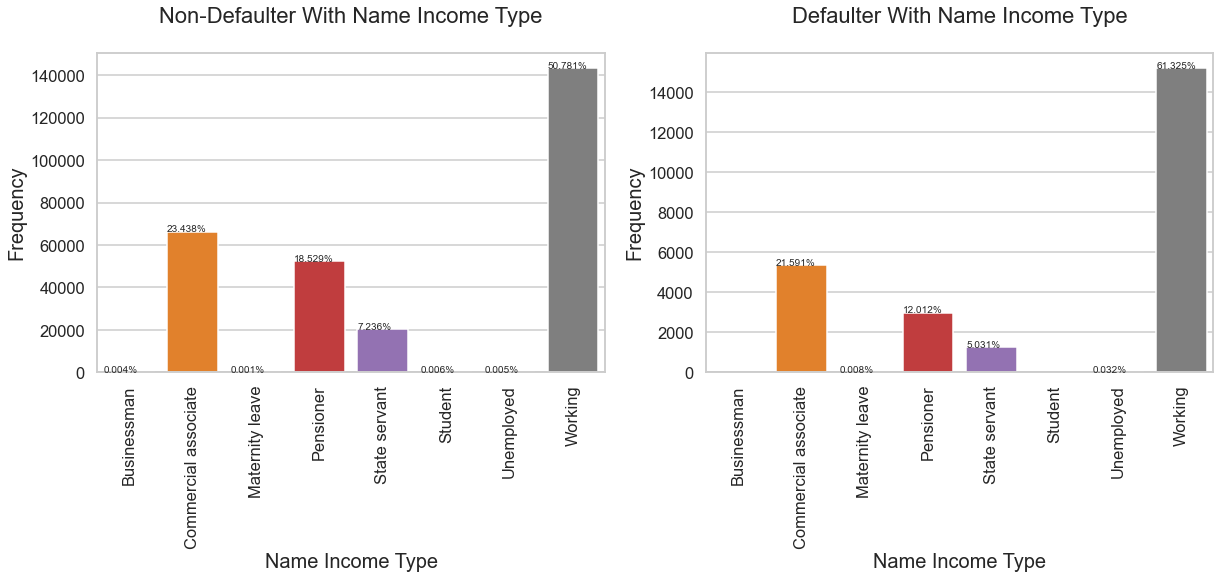

In [381]:
# plotting "NAME_INCOME_TYPE" on the basis of defaulter and Non defaulter
plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
ax = sns.countplot(target0['NAME_INCOME_TYPE'])
plt.xlabel("Name Income Type")
plt.ylabel("Frequency")
plt.title("Non-Defaulter With Name Income Type") 
plt.xticks(rotation=90)

total = len(target0)
for i in ax.patches:
        percentage = '{:.3f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))



plt.subplot(3,2,2)
ax = sns.countplot(target1['NAME_INCOME_TYPE'])
plt.xlabel("Name Income Type")
plt.ylabel("Frequency")
plt.title("Defaulter With Name Income Type") 
plt.xticks(rotation=90)

total = len(target1)
for i in ax.patches:
        percentage = '{:.3f}%'.format(100 * i.get_height()/total)
        x = i.get_x()
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))

plt.show()


##### Inference:
- Most of applicant for loans have income type as "Working", Followed by "Commercial assiociate","Pensioner","State servant".
- Student and Bussinessman do not have any defaulter records.

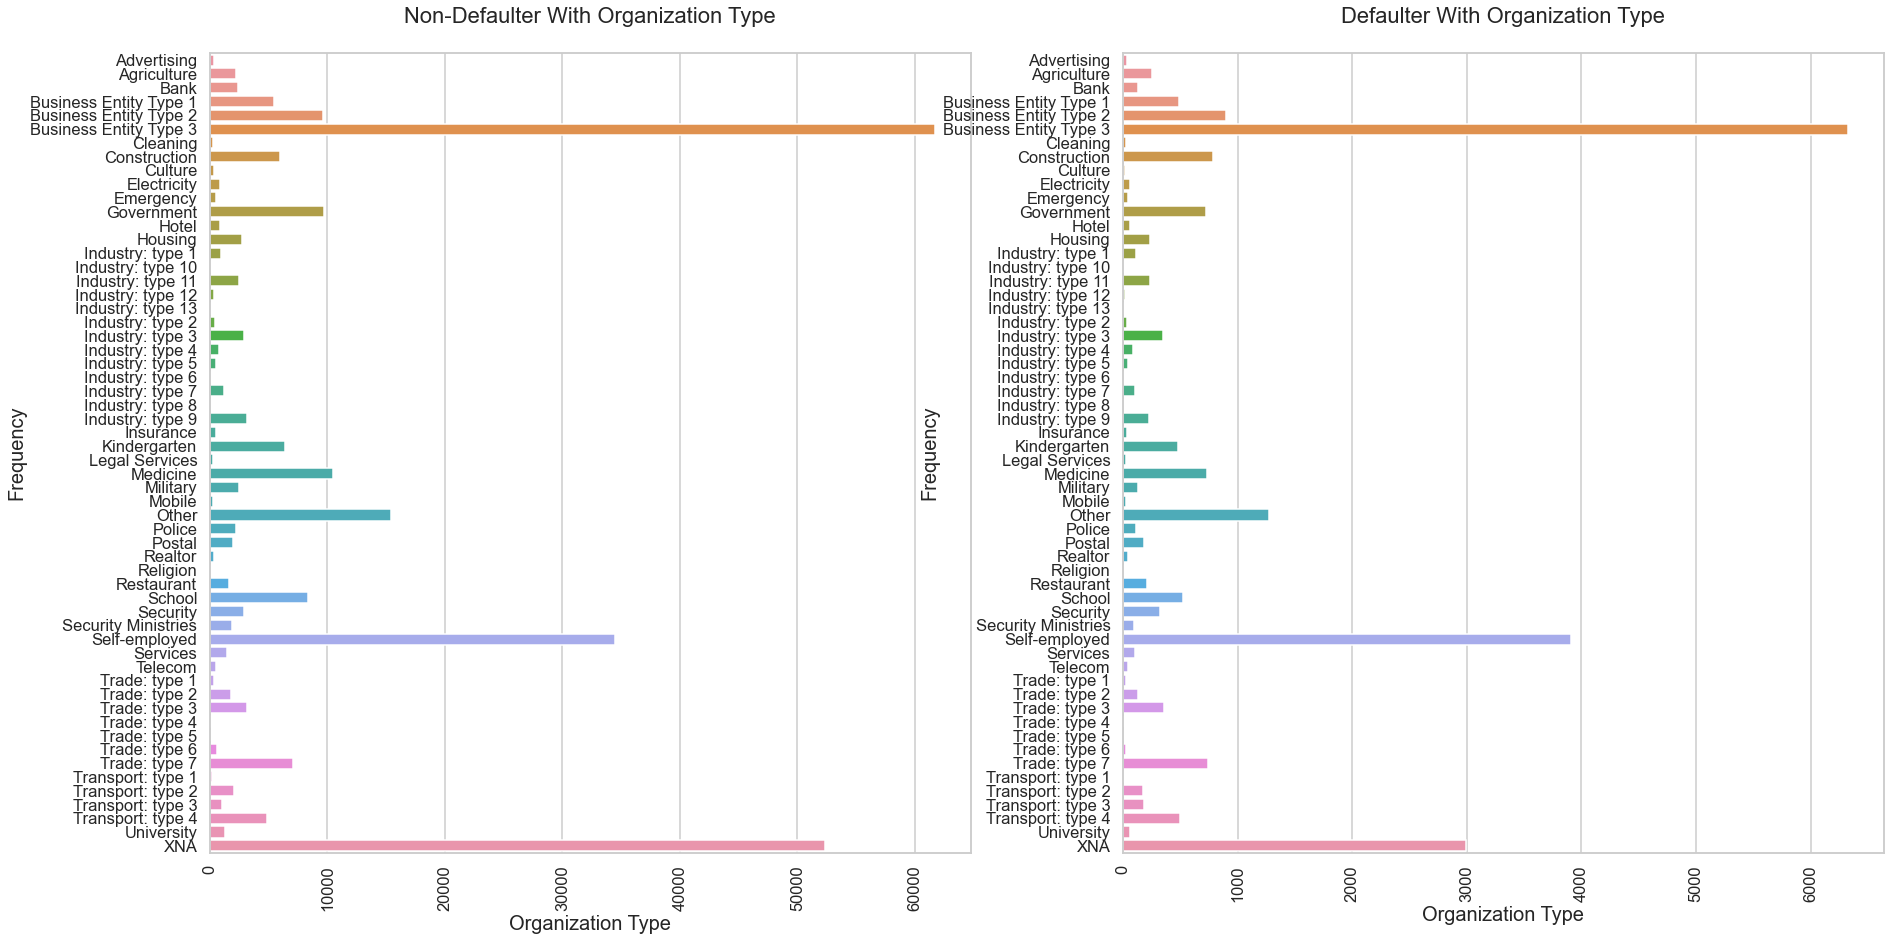

In [382]:
# plotting "ORGANIZATION_TYPE" on the basis of defaulter and Non defaulter
plt.figure(figsize=[30,50])
plt.subplot(3,2,1)
sns.countplot(y =target0['ORGANIZATION_TYPE'])
plt.xlabel("Organization Type")
plt.ylabel("Frequency")
plt.title("Non-Defaulter With Organization Type") 
plt.xticks(rotation=90)

plt.subplot(3,2,2)
sns.countplot(y =target1['ORGANIZATION_TYPE'])
plt.xlabel("Organization Type")
plt.ylabel("Frequency")
plt.title("Defaulter With Organization Type") 
plt.xticks(rotation=90)



plt.show()

##### Inference:
- Business Entity Type-3 and Self-employed are more likely to take loans.

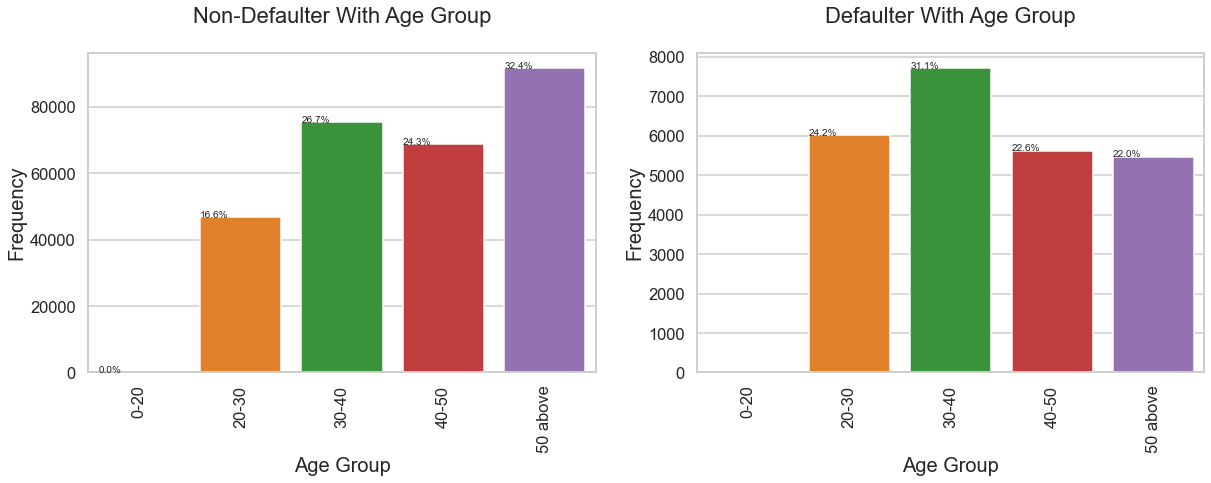

In [383]:
#  plotting "AGE_GROUP" on the basis of defaulter and Non defaulter
plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
ax = sns.countplot(target0['AGE_GROUP'])
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Non-Defaulter With Age Group") 
plt.xticks(rotation=90)
total = len(target0)
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))


plt.subplot(3,2,2)
ax = sns.countplot(target1['AGE_GROUP'])
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Defaulter With Age Group") 
plt.xticks(rotation=90)
total = len(target1)
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))

plt.show()

##### Inference:
- Mostly Non-defaulter belong to age group above 50.
- In 30-40 age group most applicants are defaulters.

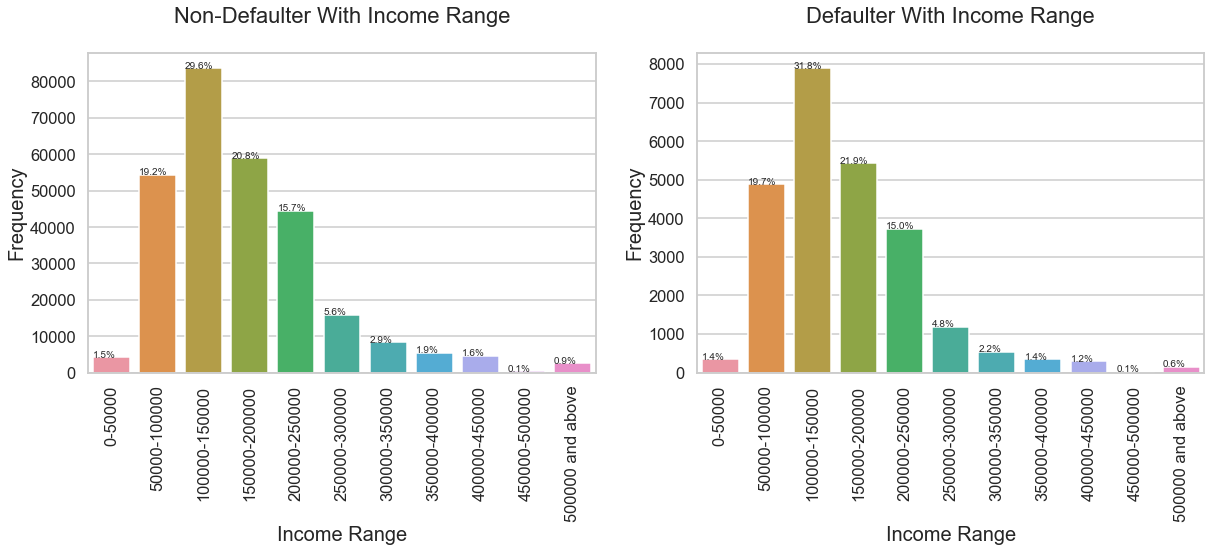

In [384]:
#  plotting "AMT_INCOME_RANGE" on the basis of defaulter and Non defaulter
plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
ax  =sns.countplot(target0['AMT_INCOME_RANGE'])
plt.xlabel("Income Range")
plt.ylabel("Frequency")
plt.title("Non-Defaulter With Income Range") 
plt.xticks(rotation=90)
total = len(target0)
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))
plt.subplot(3,2,2)
ax  = sns.countplot(target1['AMT_INCOME_RANGE'])
plt.xlabel("Income Range")
plt.ylabel("Frequency")
plt.title("Defaulter With Income Range") 
plt.xticks(rotation=90)
total = len(target1)
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))

plt.show()

##### Inference:
- Applicant with income range of 0-50000 are more Non-Defaulter as compared Defaulter.
- lowest defaulter are above 4.5 lakhs category. 
- Most of the defaulter and non- Defaulter applicants have income range between 50k to 2.5 lakhs.

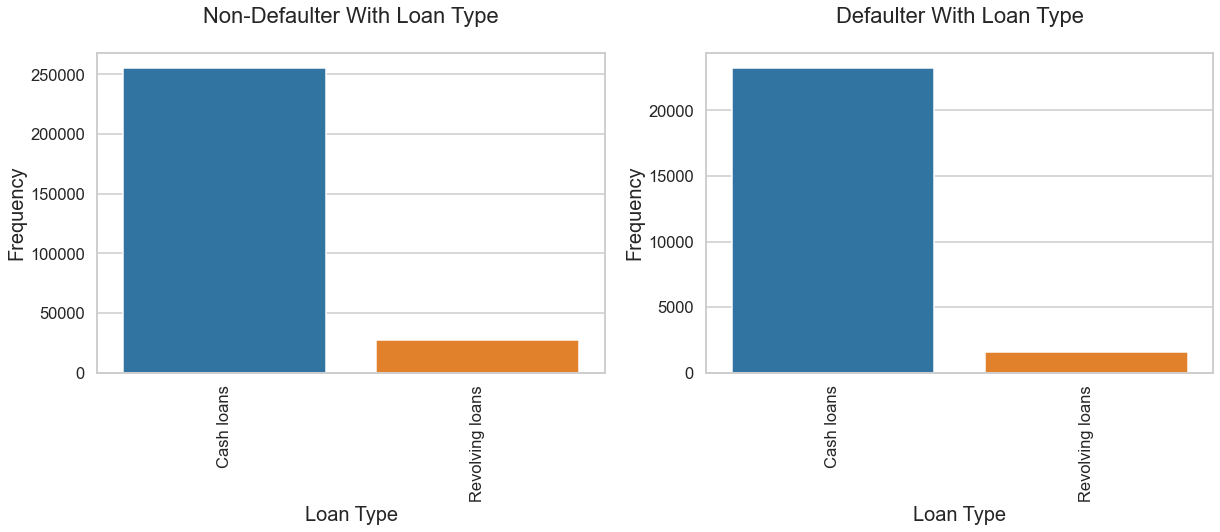

In [385]:
#  plotting "NAME_CONTRACT_TYPE" on the basis of defaulter and Non defaulter

plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
sns.countplot(target0['NAME_CONTRACT_TYPE'])
plt.xlabel("Loan Type")
plt.ylabel("Frequency")
plt.title("Non-Defaulter With Loan Type") 
plt.xticks(rotation=90)

plt.subplot(3,2,2)
sns.countplot(target1['NAME_CONTRACT_TYPE'])
plt.xlabel("Loan Type")
plt.ylabel("Frequency")
plt.title("Defaulter With Loan Type") 
plt.xticks(rotation=90)
plt.show()

##### Inference:
- Most of the Applicant prefer to take Cash loans as compared to Revolving loans in both catergories

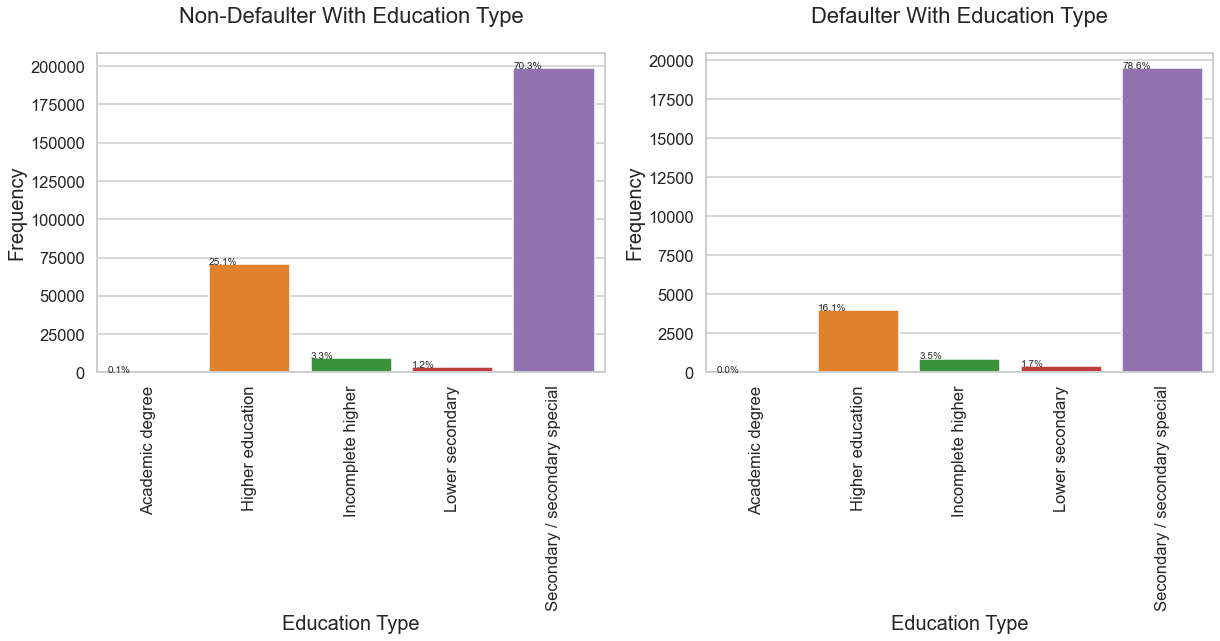

In [386]:
# Plotting "NAME_EDUCATION_TYPE" on the basis of defaulter and Non defaulter
plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
ax = sns.countplot(target0['NAME_EDUCATION_TYPE'])
plt.xlabel("Education Type")
plt.ylabel("Frequency")
plt.title("Non-Defaulter With Education Type") 
plt.xticks(rotation=90)
total = len(target0)
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))

plt.subplot(3,2,2)
ax  = sns.countplot(target1['NAME_EDUCATION_TYPE'])
plt.xlabel("Education Type")
plt.ylabel("Frequency")
plt.title("Defaulter With Education Type") 
plt.xticks(rotation=90)
total = len(target1)
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))
plt.show()

##### Inference:
- Most of the applicant of loan belong to Secondary/Secondary special catergory.
- lowest number of applicant are from Academic degree that too they are Non-defaulters.

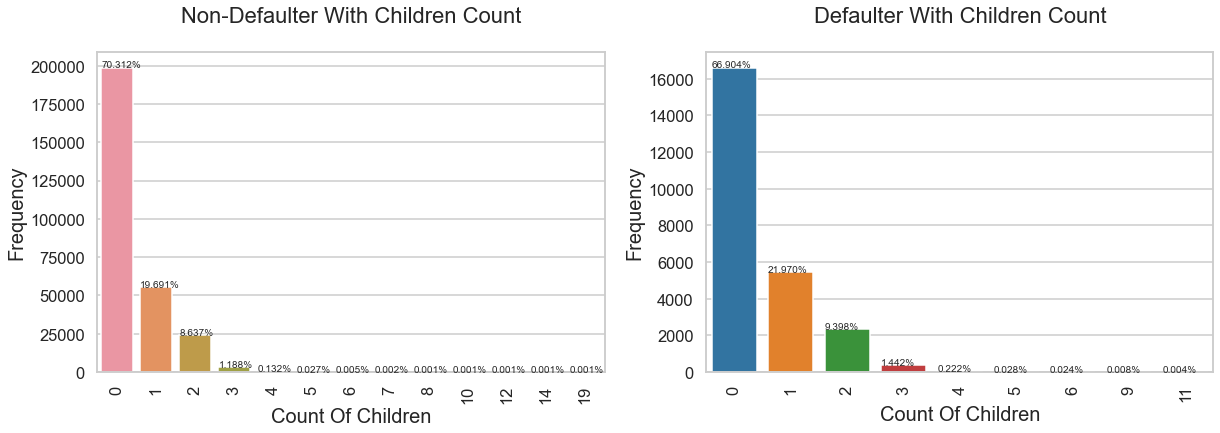

In [387]:
#plotting "CNT_CHILDREN" on the basis of defaulter and Non defaulter
plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
ax = sns.countplot(target0['CNT_CHILDREN'])
plt.xlabel("Count Of Children")
plt.ylabel("Frequency")
plt.title("Non-Defaulter With Children Count") 
plt.xticks(rotation=90)
total = len(target0)
for i in ax.patches:
        percentage = '{:.3f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))

plt.subplot(3,2,2)
ax= sns.countplot(target1['CNT_CHILDREN'])
plt.xlabel("Count Of Children")
plt.ylabel("Frequency")
plt.title("Defaulter With Children Count") 
plt.xticks(rotation=90)
total = len(target1)
for i in ax.patches:
        percentage = '{:.3f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))
plt.show()

##### Inference:
- Most applicant have either 0 or 1 children in both the categories.
- Very few applicant has more then 3 children
- Applicant having 1 or 2 children are presnt in both the catergories.hence further analysis is required to come to any conclusion.

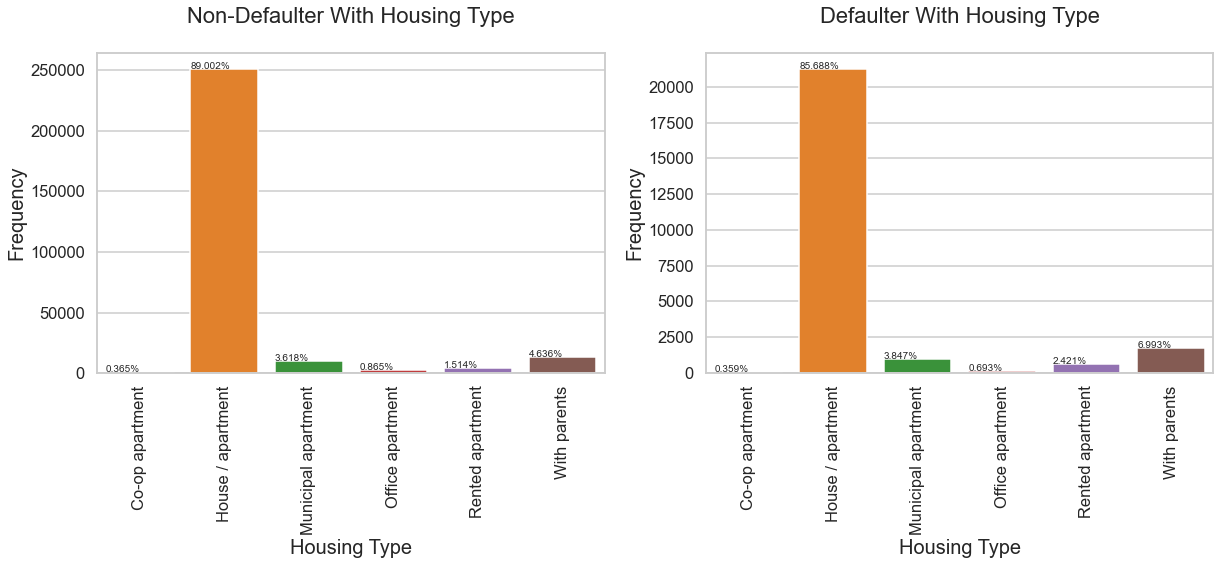

In [388]:
#Plotting "NAME_HOUSING_TYPE" on the basis of defaulter and Non defaulter
plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
ax = sns.countplot(target0['NAME_HOUSING_TYPE'])
plt.xlabel("Housing Type")
plt.ylabel("Frequency")
plt.title("Non-Defaulter With Housing Type") 
plt.xticks(rotation=90)
total = len(target0)
for i in ax.patches:
        percentage = '{:.3f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))


plt.subplot(3,2,2)
ax = sns.countplot(target1['NAME_HOUSING_TYPE'])
plt.xlabel("Housing Type")
plt.ylabel("Frequency")
plt.title("Defaulter With Housing Type") 
plt.xticks(rotation=90)
total = len(target1)
for i in ax.patches:
        percentage = '{:.3f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))

plt.show()

##### Inference:
- Most of the applicant live in house or apartment and with parents.
- Applicant living office apartment or co-op aparment have less percantage of default rate.
- Applicant living with parents and living in rented apartment have high probability of defaulting

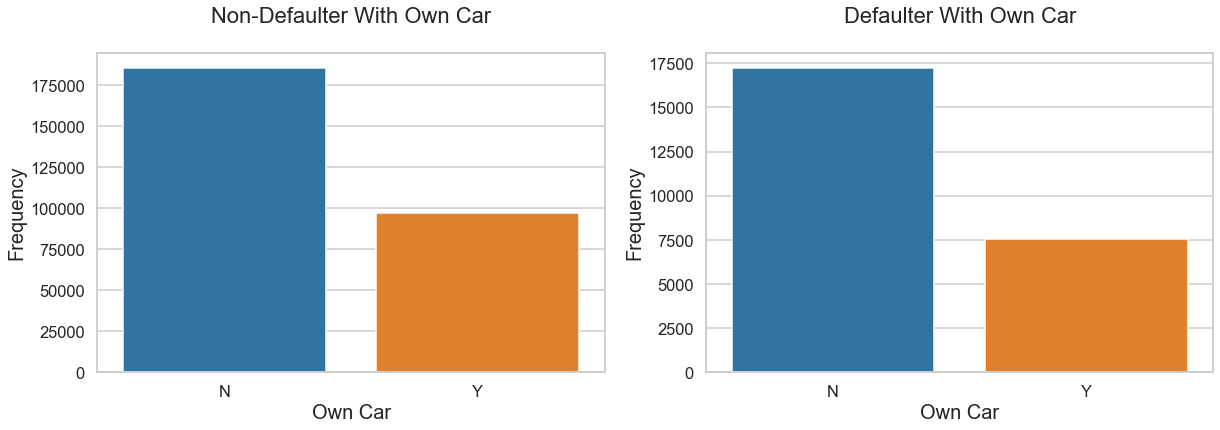

In [389]:
#Plotting "FLAG_OWN_CAR" on the basis of defaulter and Non defaulter
plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
sns.countplot(target0['FLAG_OWN_CAR'])
plt.xlabel("Own Car")
plt.ylabel("Frequency")
plt.title("Non-Defaulter With Own Car") 

plt.subplot(3,2,2)
sns.countplot(target1['FLAG_OWN_CAR'])
plt.xlabel("Own Car")
plt.ylabel("Frequency")
plt.title("Defaulter With Own Car") 

plt.show()

##### Inference:
- Majority of applicants don't own a car.

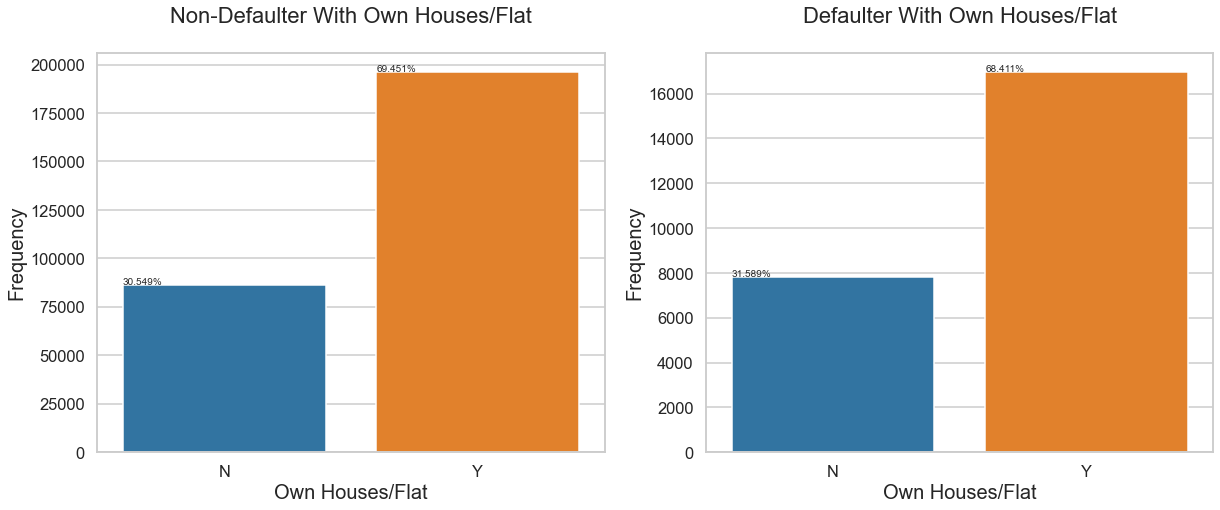

In [390]:
#Plotting "FLAG_OWN_REALTY" on the basis of defaulter and Non defaulter
plt.figure(figsize=[20,25])
plt.subplot(3,2,1)
ax=sns.countplot(target0['FLAG_OWN_REALTY'])
plt.xlabel("Own Houses/Flat")
plt.ylabel("Frequency")
plt.title("Non-Defaulter With Own Houses/Flat")
total = len(target0)
for i in ax.patches:
        percentage = '{:.3f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))

plt.subplot(3,2,2)
ax=sns.countplot(target1['FLAG_OWN_REALTY'])
plt.xlabel("Own Houses/Flat")
plt.ylabel("Frequency")
plt.title("Defaulter With Own Houses/Flat")
total = len(target1)
for i in ax.patches:
        percentage = '{:.3f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))

plt.show()

##### Inference:
- Most of the applicants own a House/Flat.

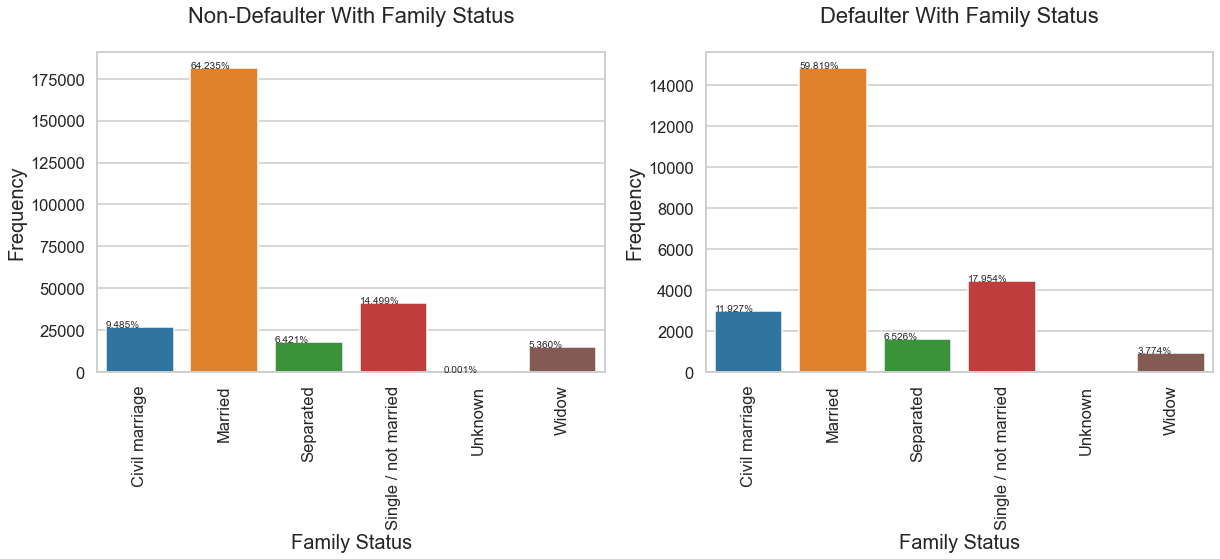

In [391]:
#Plotting "NAME_FAMILY_STATUS" on the basis of defaulter and Non defaulter
plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
ax=sns.countplot(target0['NAME_FAMILY_STATUS'])
plt.xlabel("Family Status")
plt.ylabel("Frequency")
plt.title("Non-Defaulter With Family Status") 
plt.xticks(rotation=90)
total = len(target0)
for i in ax.patches:
        percentage = '{:.3f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))

plt.subplot(3,2,2)
ax=sns.countplot(target1['NAME_FAMILY_STATUS'])
plt.xlabel("Family Status")
plt.ylabel("Frequency")
plt.title("Defaulter With Family Status") 
plt.xticks(rotation=90)
total = len(target1)
for i in ax.patches:
        percentage = '{:.3f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))
plt.show()

##### Inference:
- Across all categories majority of loan applicants and defaulter are either "Married" or "Single/not married".
- "Single" and "Civil Marriage" categories are high risk categories, Additional verfication required.

# SEGMENTED UNIVARIATE

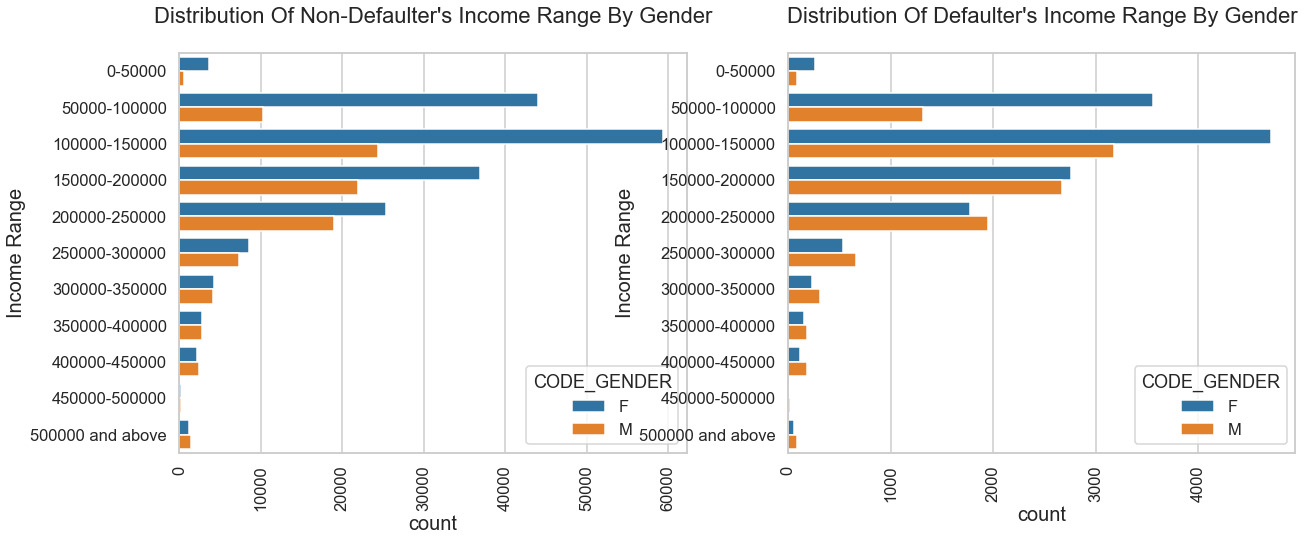

In [392]:
#plotting "AMT_INCOME_RANGE" on the basis of 'TARGET' and 'CODE_GENDER'.
plt.figure(figsize=[20,25])
plt.subplot(3,2,1)
sns.countplot(y= "AMT_INCOME_RANGE",hue = "CODE_GENDER", data = target0)
plt.ylabel("Income Range")
plt.title("Distribution Of Non-Defaulter's Income Range By Gender") 
plt.xticks(rotation=90)

plt.subplot(3,2,2)
sns.countplot(y= "AMT_INCOME_RANGE",hue = "CODE_GENDER", data = target1)
plt.ylabel("Income Range")
plt.title("Distribution Of Defaulter's Income Range By Gender") 
plt.xticks(rotation=90)

plt.show()

##### Inference:
- Applicants with an income range of 50000-2.5lakhs apply for more loans .
- Comparing both the graphs Females are less Defaulter than males
- Female counts are higher than male.

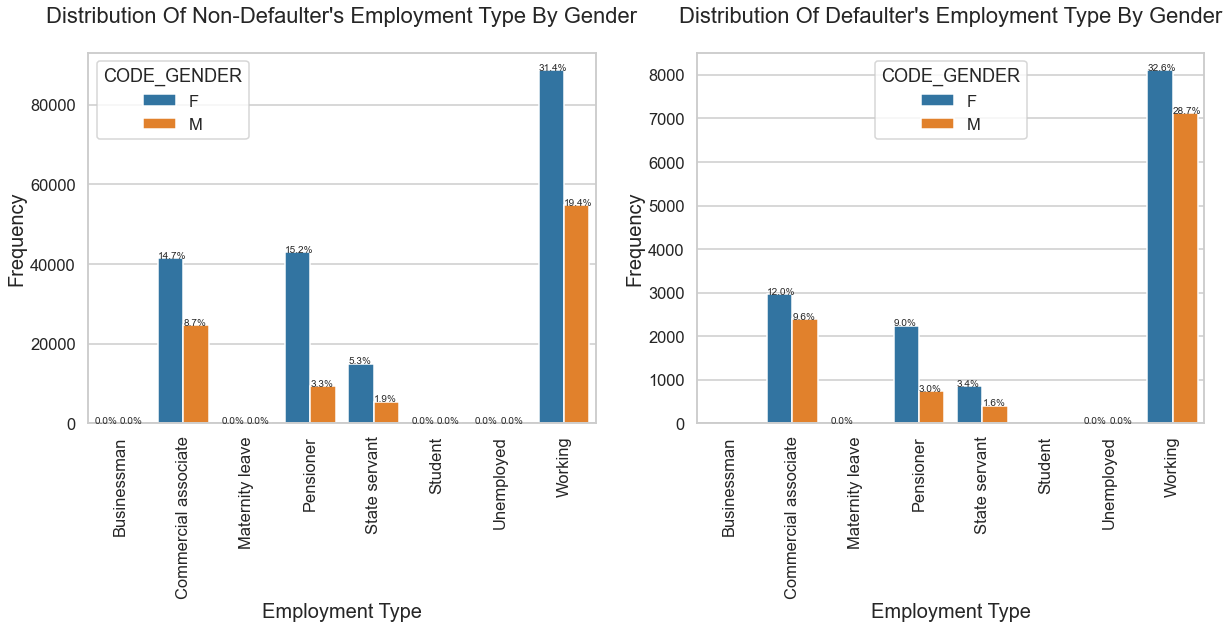

In [393]:
#Plotting "NAME_INCOME_TYPE" on the basis of 'TARGET' and 'CODE_GENDER'.
plt.figure(figsize=[20,15])
plt.subplot(2,2,1)
ax=sns.countplot(x= "NAME_INCOME_TYPE",hue = "CODE_GENDER", data = target0)
plt.xlabel("Employment Type")
plt.ylabel("Frequency")
plt.title("Distribution Of Non-Defaulter's Employment Type By Gender") 
plt.xticks(rotation=90)
total = len(target0)
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))
        
plt.subplot(2,2,2)
ax=sns.countplot(x= "NAME_INCOME_TYPE",hue = "CODE_GENDER", data = target1)
plt.xlabel("Employment Type")
plt.ylabel("Frequency")
plt.title("Distribution Of Defaulter's Employment Type By Gender") 
plt.xticks(rotation=90)
total = len(target1)
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))
plt.show()

##### Inference:
- Applicants belonging to category "Working","Commercial associate","State Servant","Pensioner" tend to take more loans,across both the genders.
- Category "Bussinessman" and "Students"comes under high risk categories though they are Non-Defaulters,across both the genders.
- We can consider females to be  more reliable for providing loan as compared to males.
- Working class males defaults more.

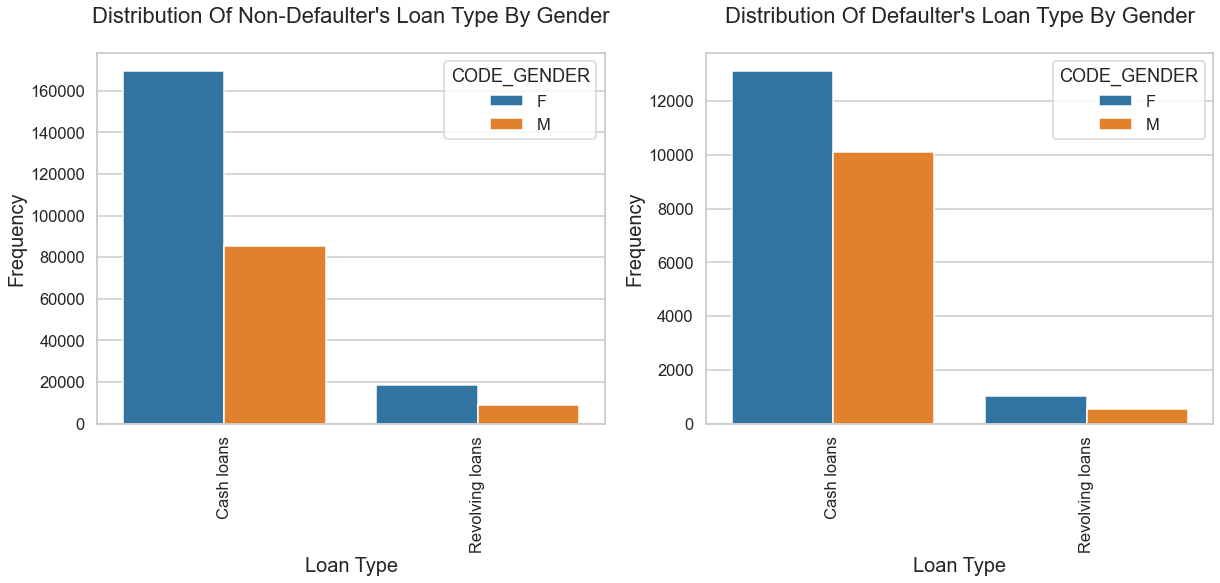

In [394]:
#Plotting "NAME_CONTRACT_TYPE" on the basis of 'TARGET' and 'CODE_GENDER'.
plt.figure(figsize=[20,15])
plt.subplot(2,2,1)
sns.countplot(x= "NAME_CONTRACT_TYPE",hue = "CODE_GENDER", data = target0)
plt.xlabel("Loan Type")
plt.ylabel("Frequency")
plt.title("Distribution Of Non-Defaulter's Loan Type By Gender") 
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.countplot(x= "NAME_CONTRACT_TYPE",hue = "CODE_GENDER", data = target1)
plt.xlabel("Loan Type")
plt.ylabel("Frequency")
plt.title("Distribution Of Defaulter's Loan Type By Gender") 
plt.xticks(rotation=90)
plt.show()


##### Inference:
- Cash loans is more preferred across the gender.
- Female applicants take cash loans more than male.
- Male defaulter are more in case of cash loans.
- Female non-defaulter are more in case of revolving loans

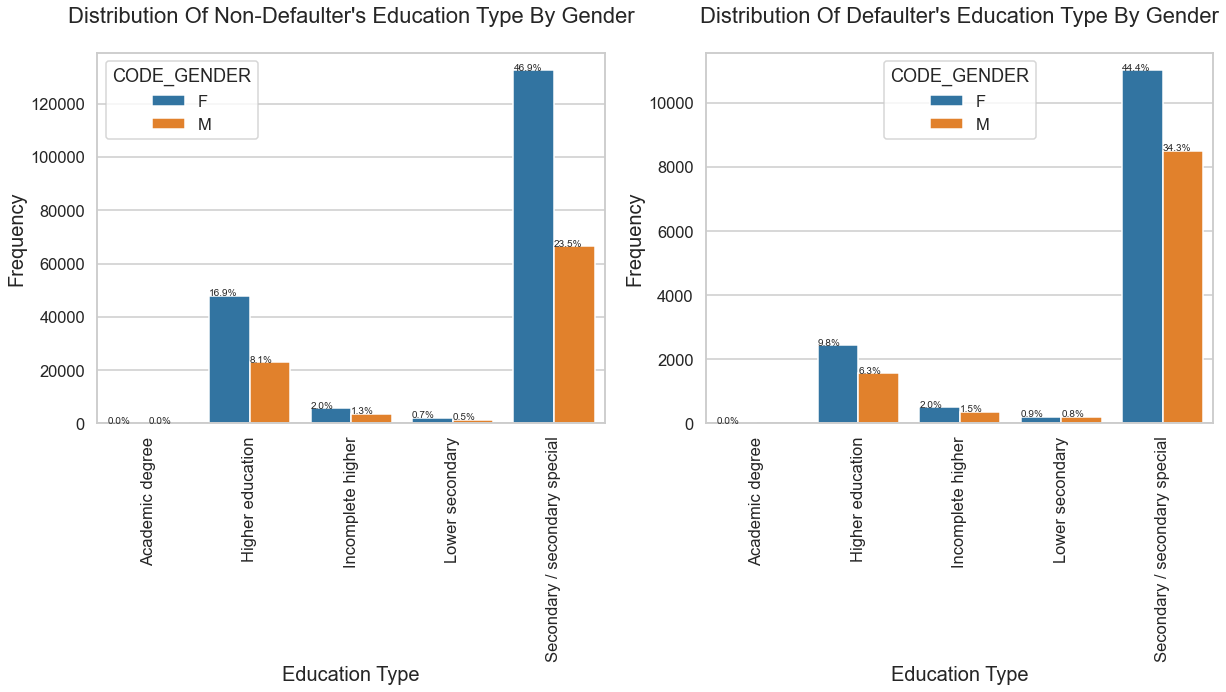

In [395]:
#Plotting "NAME_EDUCATION_TYPE" on the basis of 'TARGET' and 'CODE_GENDER'.
plt.figure(figsize=[20,15])
plt.subplot(2,2,1)
ax = sns.countplot(x= "NAME_EDUCATION_TYPE",hue = "CODE_GENDER", data = target0)
plt.xlabel("Education Type")
plt.ylabel("Frequency")
plt.title("Distribution Of Non-Defaulter's Education Type By Gender") 
plt.xticks(rotation=90)
total = len(target0)
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))

plt.subplot(2,2,2)
ax = sns.countplot(x= "NAME_EDUCATION_TYPE",hue = "CODE_GENDER", data = target1)
plt.xlabel("Education Type")
plt.ylabel("Frequency")
plt.title("Distribution Of Defaulter's Education Type By Gender") 
plt.xticks(rotation=90)
total = len(target1)
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))
plt.show()


##### Inference:
- Comparing both the graphs "Secondary/Secondary Special" are more defaulter as well as non-defaulters.
- In case of "Academic degree" there are no male defaulter.
- In case of "Lower secondary" type male defaults more.
- In case of "Higher education" type female non-defaulters are more as compared to defaulters.

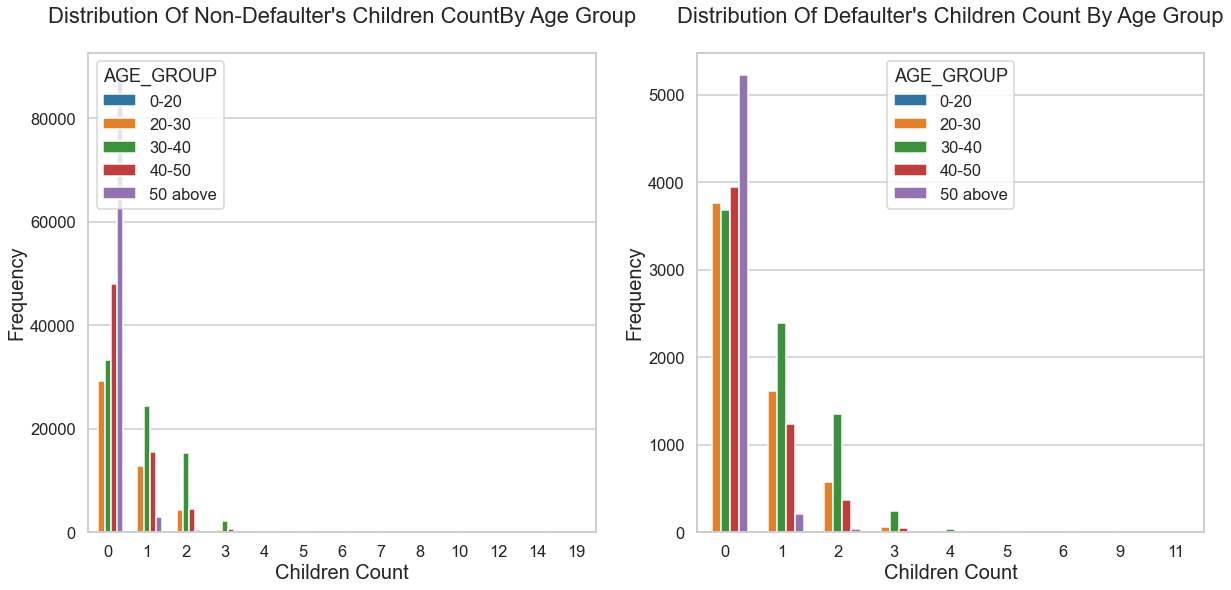

In [396]:
#Plotting "CNT_CHILDREN" on the basis of 'TARGET' and 'AGE_GROUP'.
plt.figure(figsize=[20,30])
plt.subplot(3,2,1)
sns.countplot(x= "CNT_CHILDREN",hue = "AGE_GROUP", data = target0)
plt.xlabel("Children Count")
plt.ylabel("Frequency")
plt.title("Distribution Of Non-Defaulter's Children CountBy Age Group") 



plt.subplot(3,2,2)
sns.countplot(x= "CNT_CHILDREN",hue = "AGE_GROUP", data = target1)
plt.xlabel("Children Count")
plt.ylabel("Frequency")
plt.title("Distribution Of Defaulter's Children Count By Age Group") 


plt.show()

##### Inference:
- 50 above age group applicants defaultes less, and its interesting to see the majority of them has less number of children.
- Between 40-50 age group applicants defaults more and there children counts varies from 0-4.
- From the graph it clearly visible that some applicants have 10 or more children.
- There are no applicats between 0-20 age group.

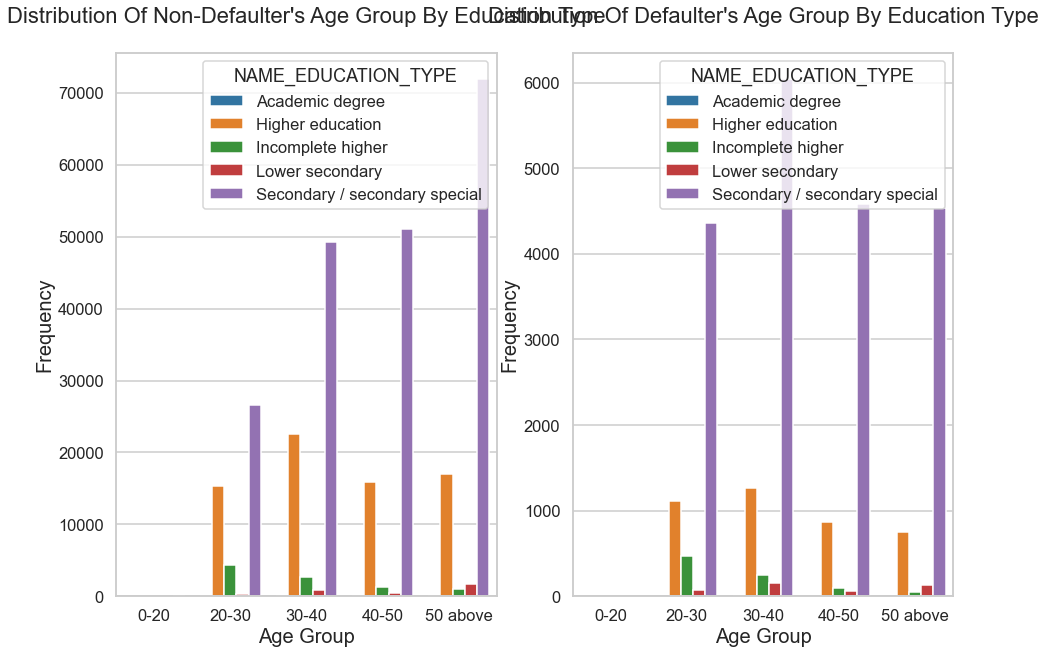

In [397]:
#Plotting "AGE_GROUP" on the basis of 'TARGET' and 'NAME_EDUCATION_TYPE'.
plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
sns.countplot(x= "AGE_GROUP",hue = "NAME_EDUCATION_TYPE", data = target0)
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Distribution Of Non-Defaulter's Age Group By Education Type") 


plt.subplot(1,2,2)
sns.countplot(x= "AGE_GROUP",hue = "NAME_EDUCATION_TYPE", data = target1)
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Distribution Of Defaulter's Age Group By Education Type") 

plt.show()

##### Inference:
- 30-40 age group applicants with "Secondary" education has more number of defaulters.
- 30-40 age group applicants with "Higher education" type has more non-defaulter.
- 50 above age group applicants with "Secondary"education type has more number of non-defaulters.

# Bivariate analysis

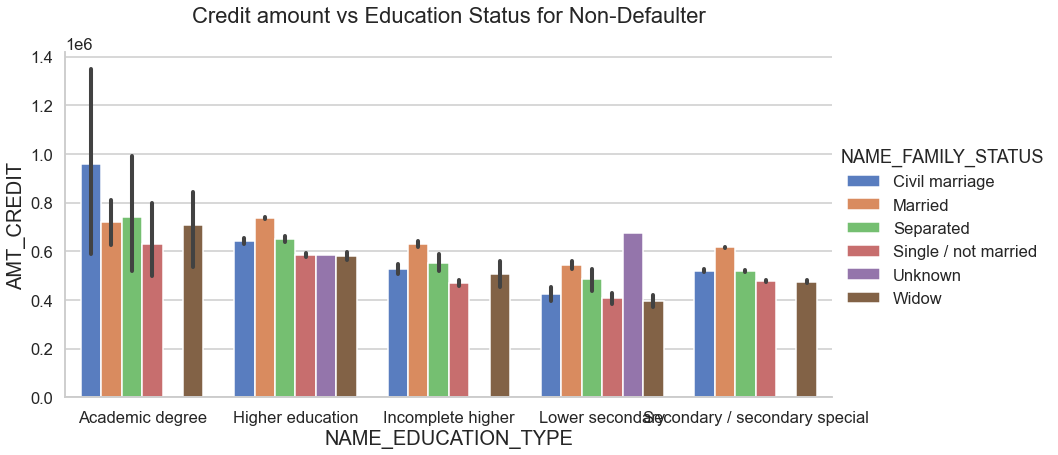

In [398]:
# Plotting Credit amount with respect to Education status for Non-Defaulters
sns.catplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=6,aspect=2, kind="bar", palette="muted")
plt.title('Credit amount vs Education Status for Non-Defaulter')
plt.show()

##### Inference
- Applicants holding "Academic degree" have greater credit amount, "Civil marriage" segment being the highest among them.
- "lower secondary" educated applicants tends to have lower credit amount, Widows being the lowest among them.
- "Separated" applicants have higher credit amount with "Academic degree" as compared all other segments.
- "Civil Marriage" applicants have higher credit amount with "Academic degree" are less defaulters.

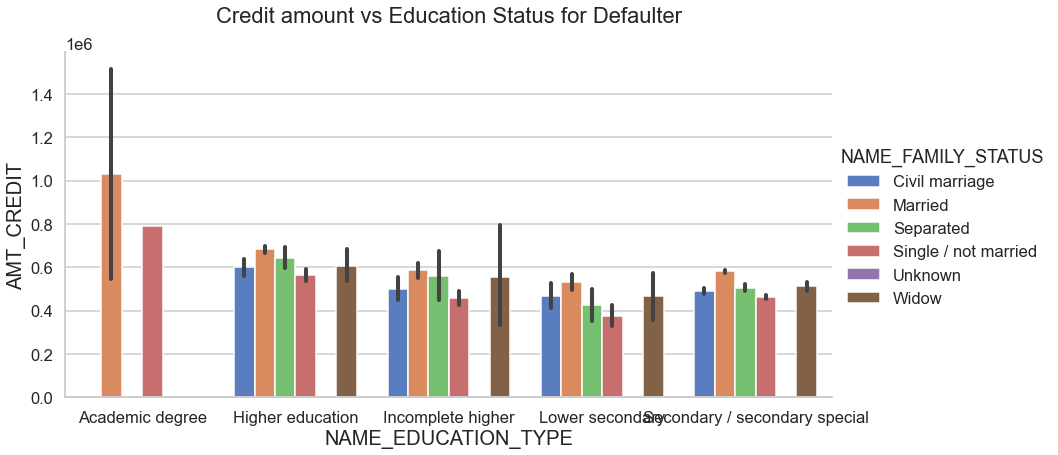

In [399]:
# Plotting Credit amount with respect to Education status for Defaulters
sns.catplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=6,aspect=2, kind="bar", palette="muted")
plt.title('Credit amount vs Education Status for Defaulter')
plt.show()

##### Inference:
- Married Academic degree holding applicants generally have a higher credit amount and so their default rate is also high.
- Applicant holding "lower secondary" education tends to have a lower credit amount across all segment.
- "Single"and "Married" are the only 2 family types present in academic degree 

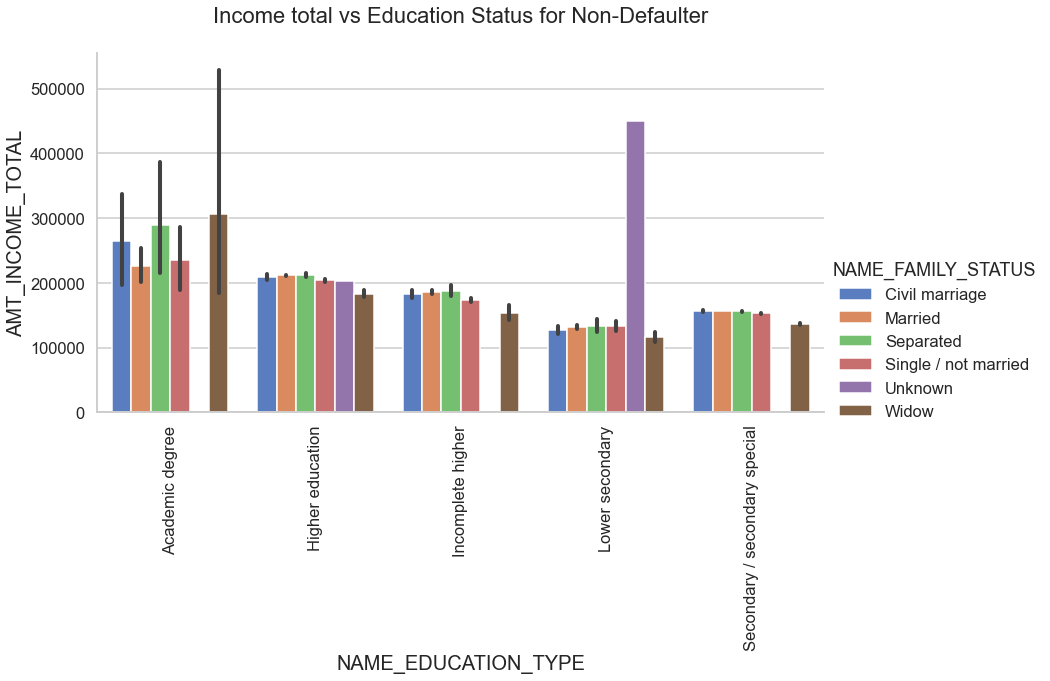

In [400]:
# Plotting Income range with respect to Education status for Defaulters
sns.catplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',height=6,aspect=2, kind="bar", palette="muted")
plt.title('Income total vs Education Status for Non-Defaulter')
plt.xticks(rotation=90)
plt.show()

##### Inference:
###### In case Non-defaulters
- "Academic degree" segments has higher income amount as compared to other segment.
- In case of "Widow" with "Academic degree" has highest income amount across all other eduaction segement as well as family status.
- There are few applicant in education type "lower secondary" who has income more than 3 lakhs but they didn't disclose their family status.
- In case of "Secondary" education type all the family status belongs in the income amount between 0- 2 lakhs.

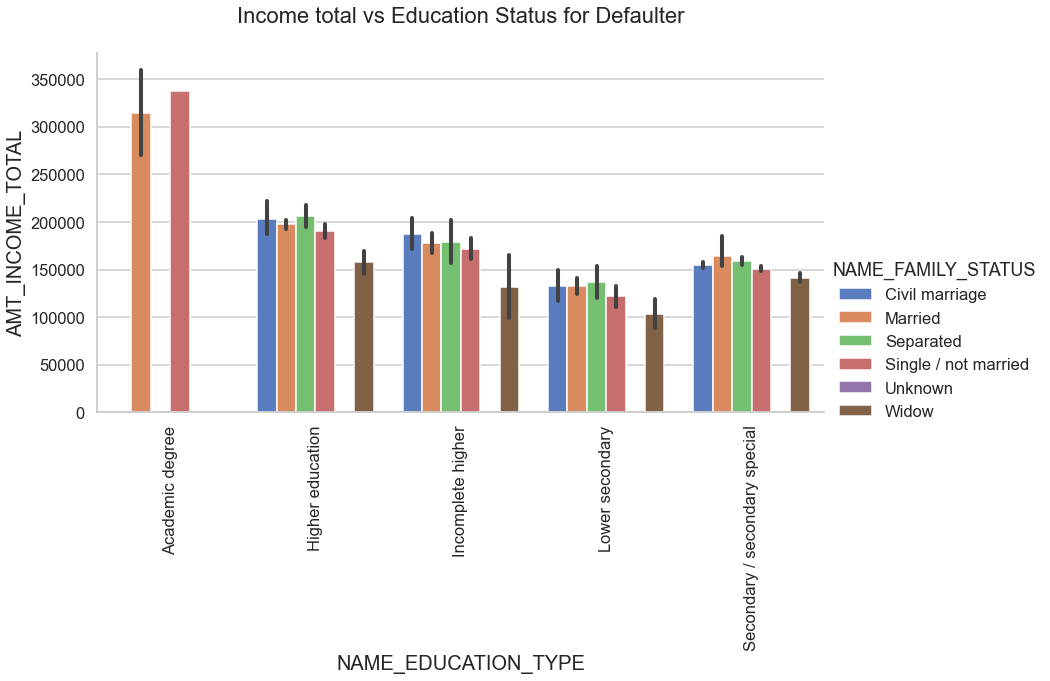

In [401]:
# Plotting Income range with respect to Education status for Non-Defaulters
sns.catplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',height=6,aspect=2, kind="bar", palette="muted")
plt.title('Income total vs Education Status for Defaulter')
plt.xticks(rotation=90)
plt.show()

##### Inference:
###### In case of Defaulters
- "Married" and "Single" status applicants has highest income amount as compared other family status.
- "Lower secondary" eduaction type applicant has the lowest income amount.
-  We can notice that "Single" family status applicants defaults more as compared to others.

<Figure size 1440x1440 with 0 Axes>

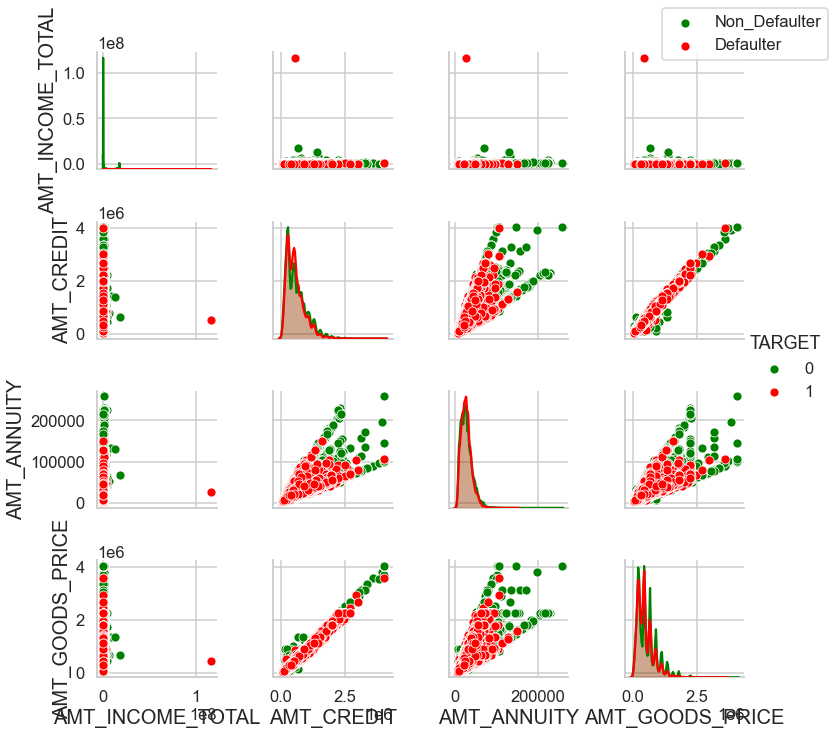

In [402]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
plt.figure(figsize=(20,20))
amount = app_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]

ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Non_Defaulter','Defaulter'])
plt.show()

##### Inference:
- AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line.


In [403]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE

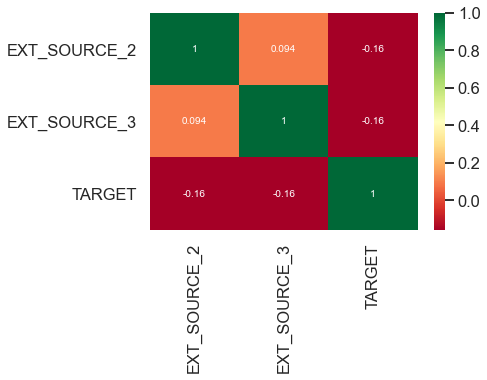

In [404]:
# Checking TARGET column
Source = app_df[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            annot = True,
            cmap ="RdYlGn")

##### Inference : 
- As per the Heatmap it seems that there is no correlation between Target variable and EXT_SOURCE_2,EXT_SOURCE_3.

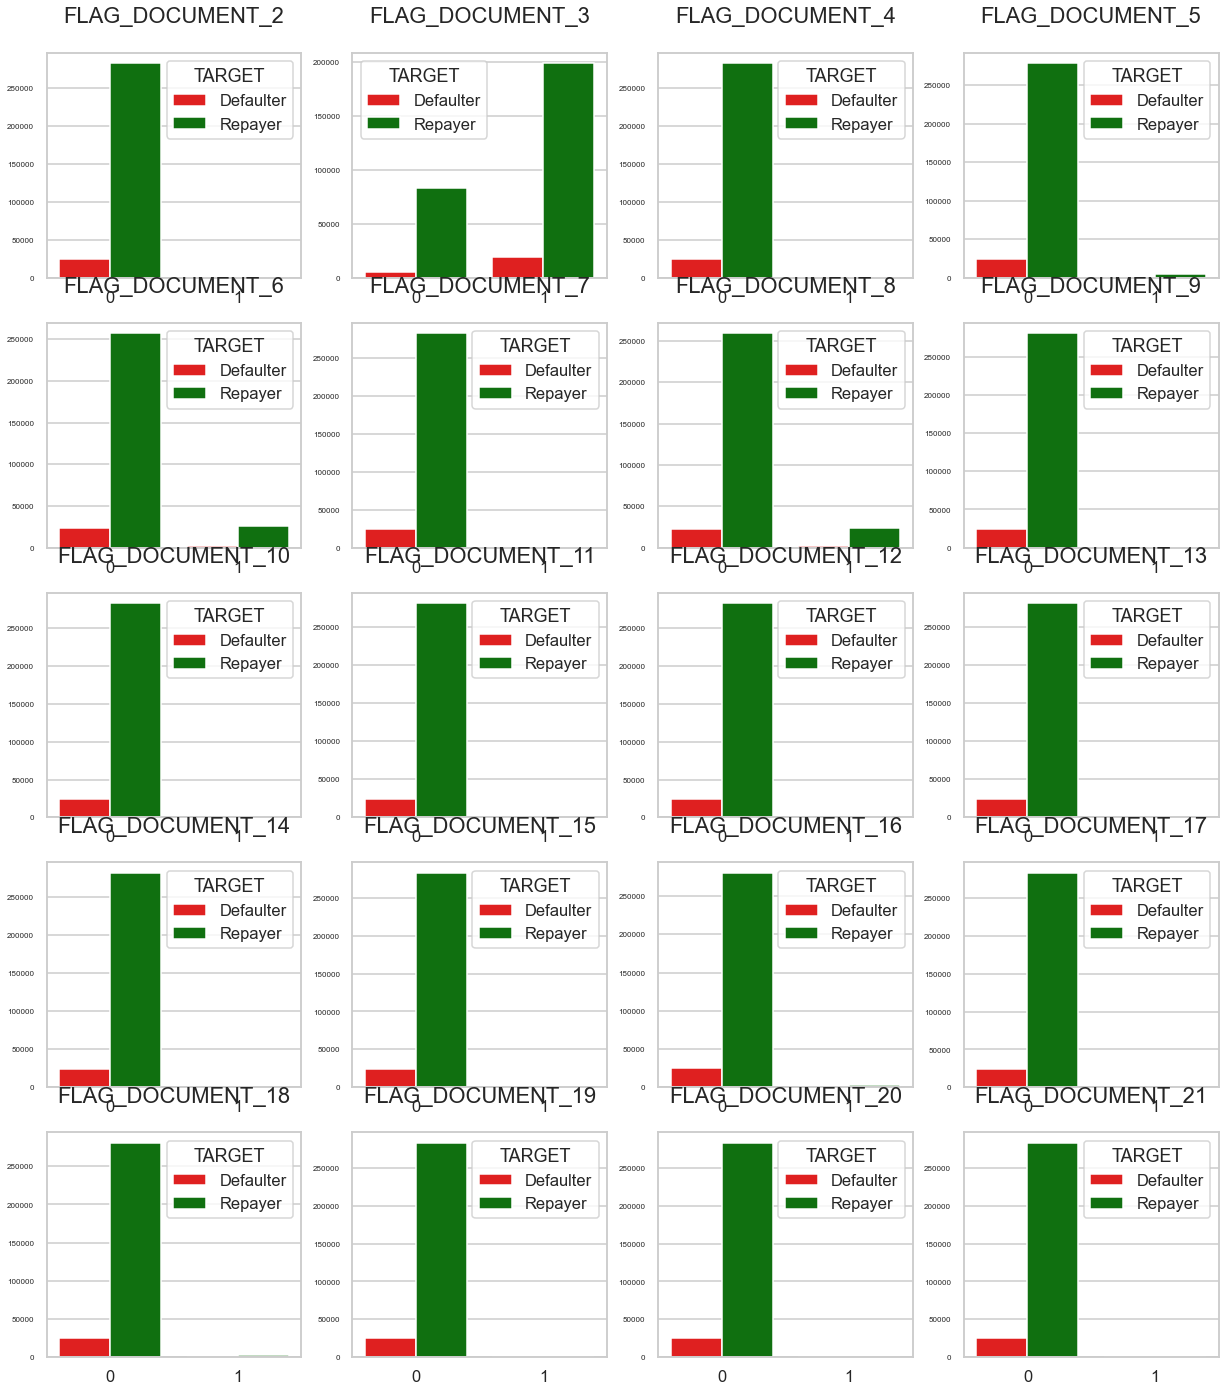

In [405]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = app_df[col_Doc+["TARGET"]]
length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

##### Inference:
- The above graph shows that in most of the loan application cases, apllicants who applied for loans has not submitted any documents except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can't consider rest of the columns. 
- Data shows if applicants has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

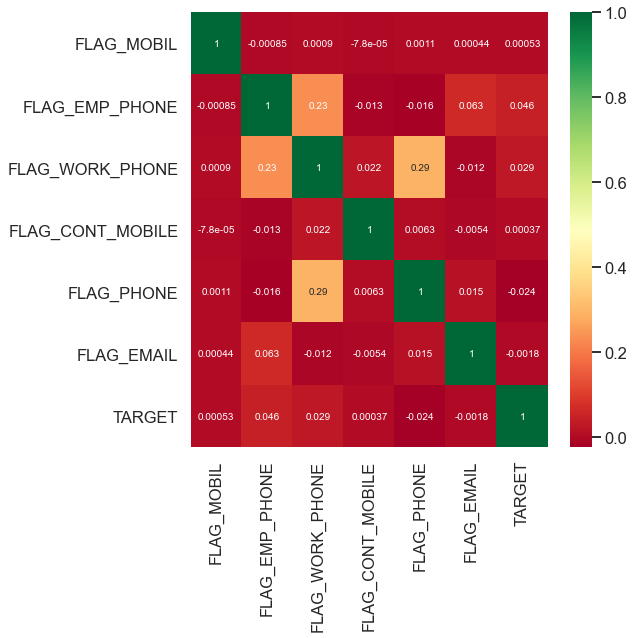

In [406]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = app_df[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            annot = True,
            cmap ="RdYlGn"
            )

##### Inference:
- As per the Heatmap it seems that there is no correlation between Target variable and Flags.

In [407]:
# Find correlation of the following columns
corr_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

Non_Defaulter_df = app_df.loc[app_df['TARGET']==0, corr_columns] # Non-Defaulters
Defaulter_df = app_df.loc[app_df['TARGET']==1, corr_columns] # Defaulters

In [408]:
# Getting the top 10 correlation for the Non-Defaulter data
corr_repayer = Non_Defaulter_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

VAR1              VAR2  Correlation
94     AMT_GOODS_PRICE        AMT_CREDIT     0.987250
230    CNT_FAM_MEMBERS      CNT_CHILDREN     0.878571
95     AMT_GOODS_PRICE       AMT_ANNUITY     0.776686
71         AMT_ANNUITY        AMT_CREDIT     0.771309
167      DAYS_EMPLOYED        DAYS_BIRTH     0.626114
70         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953
93     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.349462
47          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
138         DAYS_BIRTH      CNT_CHILDREN     0.336966
190  DAYS_REGISTRATION        DAYS_BIRTH     0.333151

In [409]:
# Getting the top 10 correlation for the Defaulter data
corr_repayer = Defaulter_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

VAR1                      VAR2  Correlation
94            AMT_GOODS_PRICE                AMT_CREDIT     0.983103
230           CNT_FAM_MEMBERS              CNT_CHILDREN     0.885484
95            AMT_GOODS_PRICE               AMT_ANNUITY     0.752699
71                AMT_ANNUITY                AMT_CREDIT     0.752195
167             DAYS_EMPLOYED                DAYS_BIRTH     0.582185
190         DAYS_REGISTRATION                DAYS_BIRTH     0.289114
375           FLAG_DOCUMENT_3             DAYS_EMPLOYED     0.272169
335  DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.264357
138                DAYS_BIRTH              CNT_CHILDREN     0.259109
213           DAYS_ID_PUBLISH                DAYS_BIRTH     0.252863

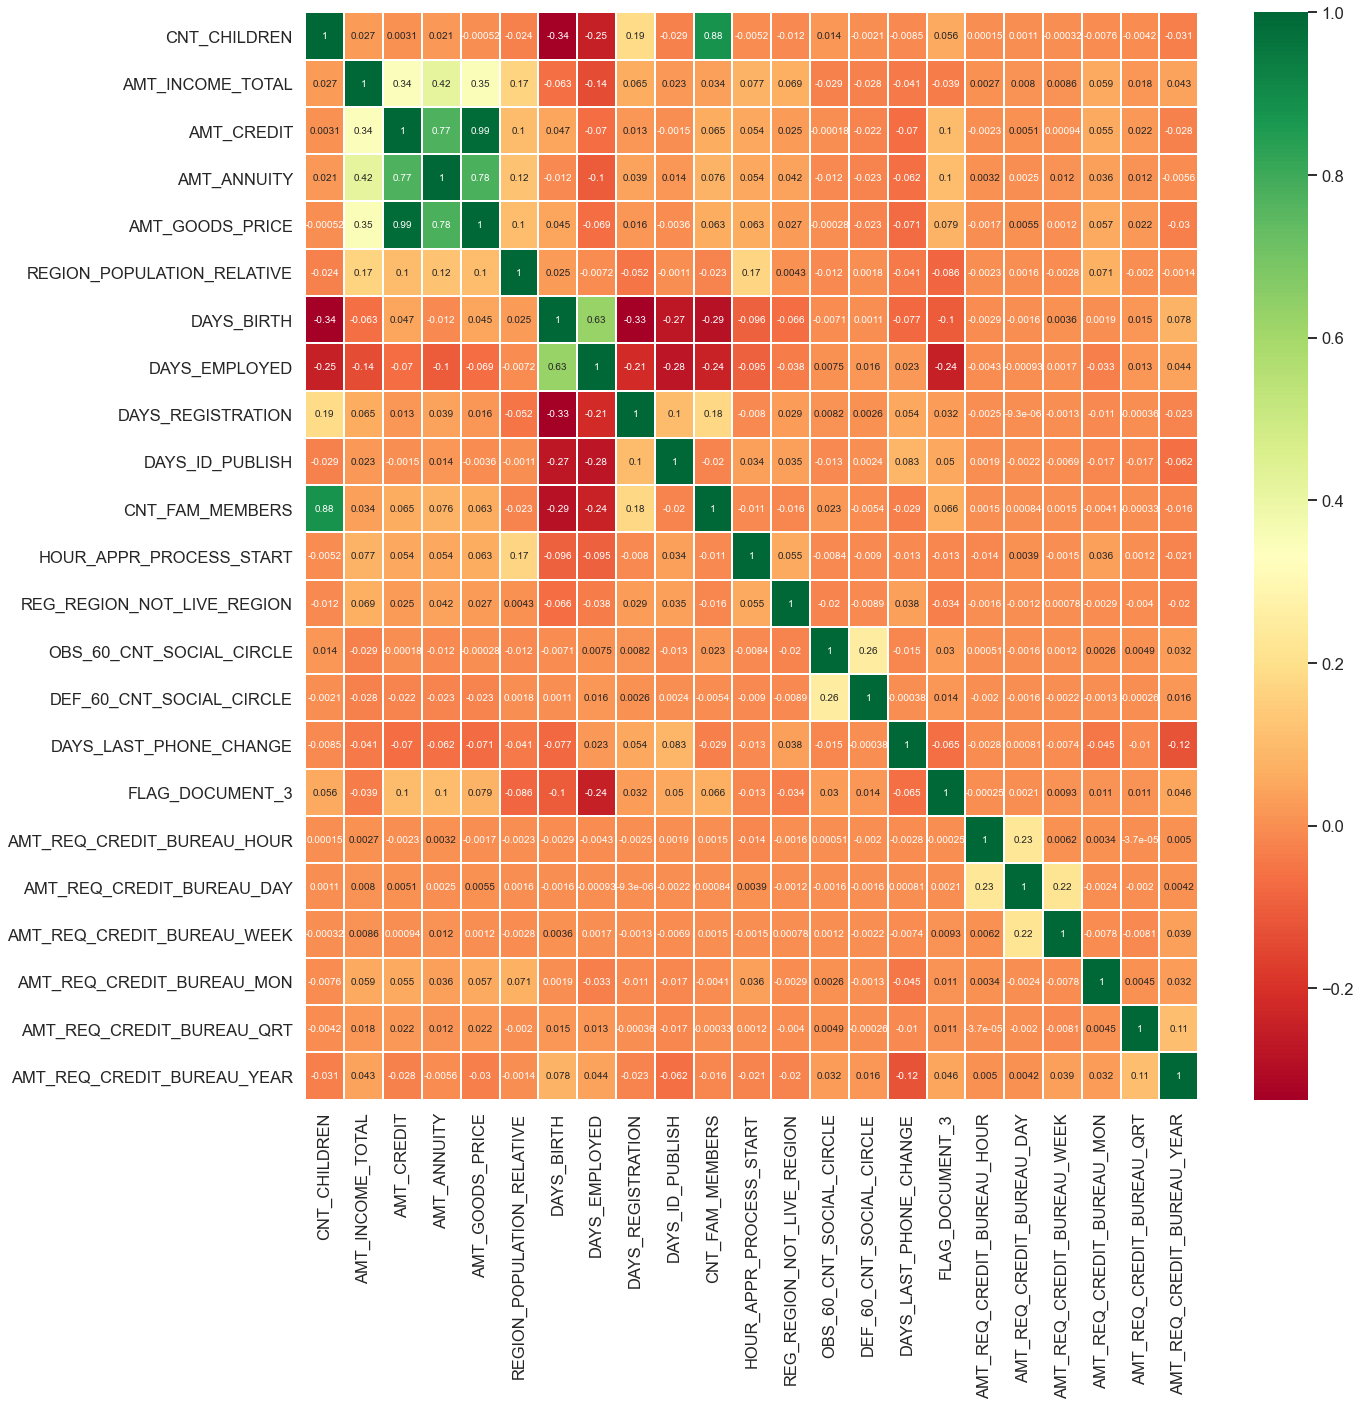

In [410]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(Non_Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

##### Inference:
###### In case of Non-defaulter
- "CNT_CHILDREN" and "CNT_FAM_MEMBERS" have high correlation.
- There is high correlation between "AMT_CREDIT" with "AMT_ANNUITY" and "AMT_CREDIT" with "AMT_GOOD_PRICE".
- "AMT_ANNUITY" and "AMT_GOOD_PRICE" has high correlation.
- "DAYS_BIRTH" and "DAYS_EMPLOYED has high correlation.

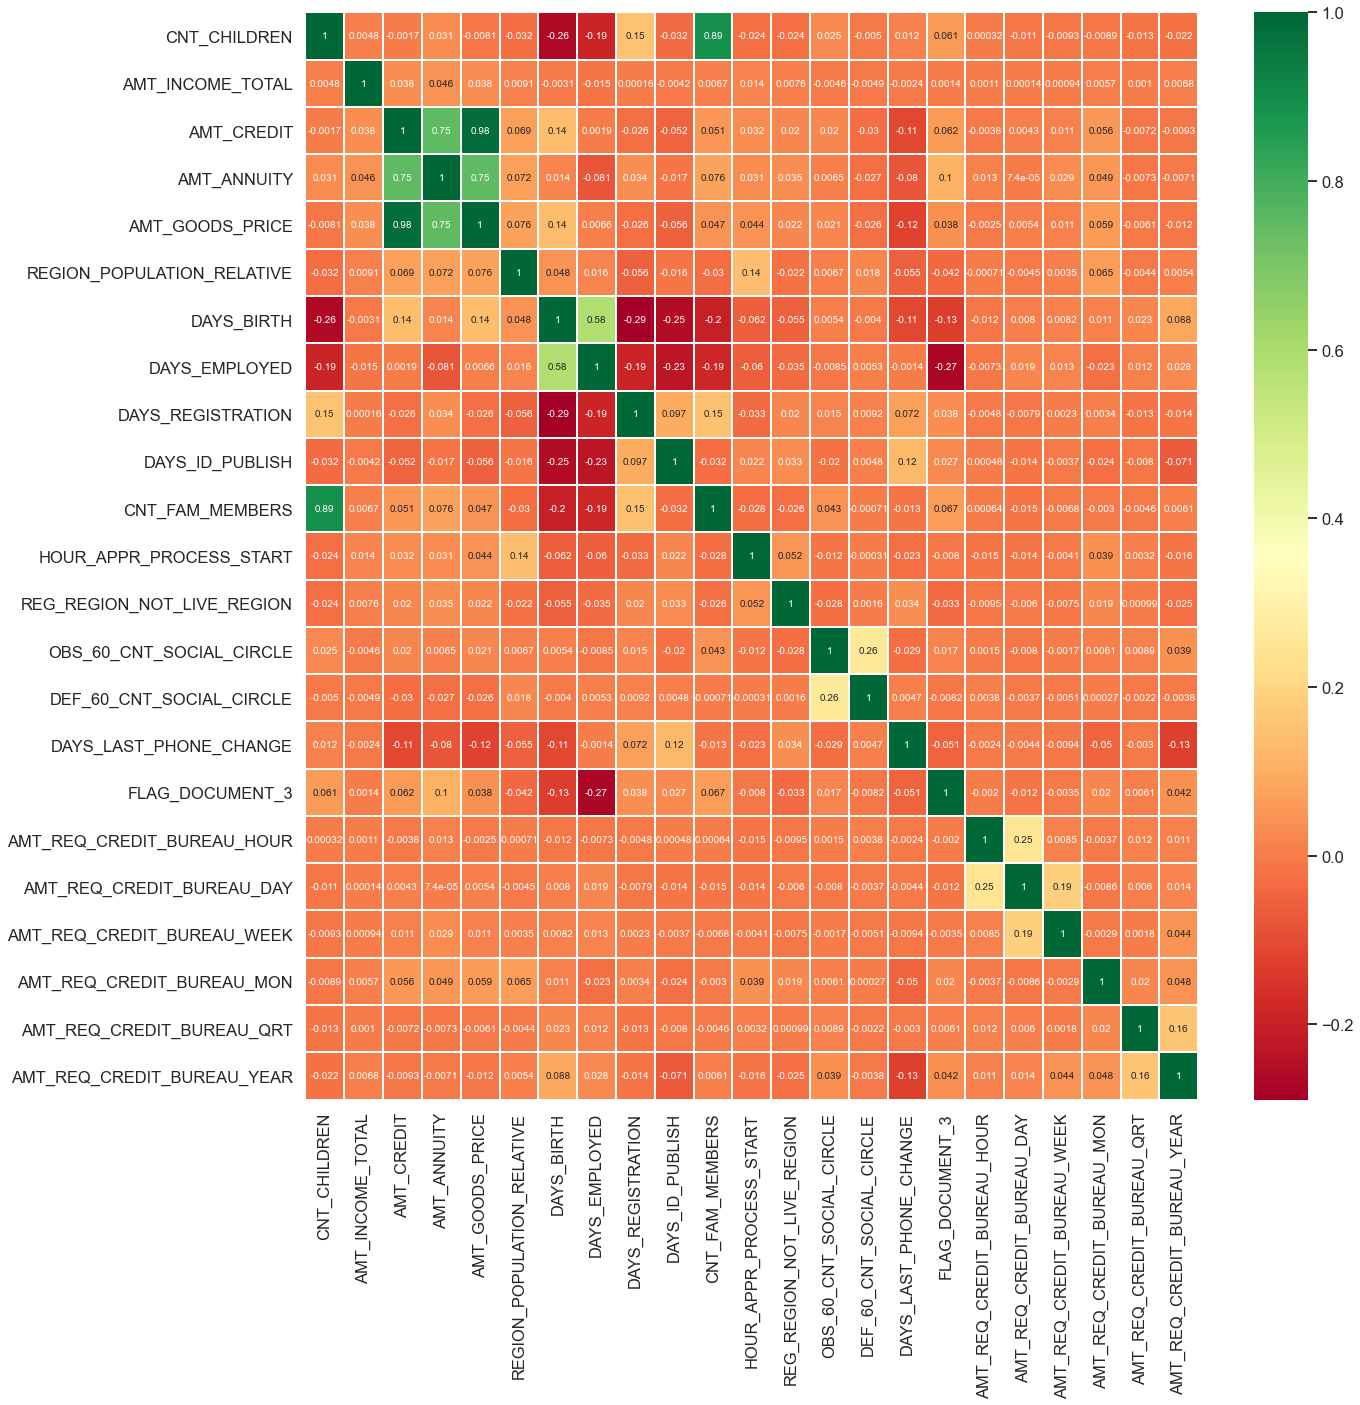

In [411]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

##### Inference:
###### In case Defaulter
- "CNT_CHILDREN" and "CNT_FAM_MEMBERS" have high correlation.
- There is high correlation between "AMT_CREDIT" with "AMT_ANNUITY" and "AMT_CREDIT" with "AMT_GOOD_PRICE".
- "AMT_ANNUITY" and "AMT_GOOD_PRICE" has high correlation.
- "DAYS_BIRTH" and "DAYS_EMPLOYED has high correlation.

# Previous Data

In [412]:
## Reading Previous Application Data
prev_df= pd.read_csv('previous_application.csv')
prev_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [413]:
# Check the number of rows and columns in the dataframe
prev_df.shape

(1670214, 37)

In [414]:
# Check the summary for the numeric columns 
prev_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

In [415]:
# Checking for percentage of null values in the dataframe previous data.
(prev_df.isnull().sum()/ len(prev_df) *100).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [416]:
# Dropping the columns with null-values more than 40%.
prev_df = prev_df.loc[:, prev_df.isnull().mean()<=0.40]

In [417]:
# Checking again the number of rows and columns in the dataframe
prev_df.shape

(1670214, 26)

In [418]:
# Checking again the percentage of the null values below 35%
(prev_df.isnull().sum()/len(prev_df)*100).sort_values(ascending = False).round(2)

AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_CASH_LOAN_PURPOSE          0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_APPLICATION                 0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CONTRACT_STATUS            0.00
NAME_YIELD_GROUP                0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
SK_ID_PREV                      0.00
dtype: float64

In [419]:
# Inspecting the column types if they are in correct data type using the above result.
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

## Data Cleaning and Imputation.

In [420]:
#Analysis of the column 'AMT_GOODS_PRICE' in previous application dataset
prev_df.AMT_GOODS_PRICE.isnull().sum()

385515

In [421]:
# Imputing the above columns with median
prev_df.AMT_GOODS_PRICE.median()
prev_df.AMT_GOODS_PRICE = prev_df.AMT_GOODS_PRICE.fillna(prev_df.AMT_GOODS_PRICE.median())


In [422]:
# Validate the above operation
prev_df.AMT_GOODS_PRICE.isnull().sum()

0

In [423]:
#Analysis of the column 'AMT_ANNUITY' in previous application dataset
prev_df.AMT_ANNUITY.isnull().sum()

372235

In [424]:
# Imputing the above columns with median
prev_df.AMT_ANNUITY.median()
prev_df.AMT_ANNUITY = prev_df.AMT_ANNUITY.fillna(prev_df.AMT_ANNUITY.median())

In [425]:
# Validate the above operation
prev_df.AMT_ANNUITY.isnull().sum()

0

In [426]:
# Analysis of "CNT_PAYMENT"
prev_df["CNT_PAYMENT"].isnull().sum()

372230

In [427]:
# Check the summary of above columns.
print(prev_df["CNT_PAYMENT"].describe())

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


In [428]:
# Impute CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:
prev_df.loc[prev_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [429]:
#Imputation of null value
prev_df['CNT_PAYMENT'].fillna(0,inplace = True)

In [430]:
# Validate the above operation
prev_df["CNT_PAYMENT"].isnull().sum()

0

In [431]:
#Analysis of the column 'PRODUCT_COMBINATION' in previous application dataset
prev_df["PRODUCT_COMBINATION"].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [432]:
prev_df["PRODUCT_COMBINATION"].isnull().sum()


346

##### We still have few null values in the PRODUCT_COMBINATION column. We can ignore as this percentage is very less.

In [433]:
prev_df["DAYS_DECISION"] = abs(prev_df["DAYS_DECISION"])

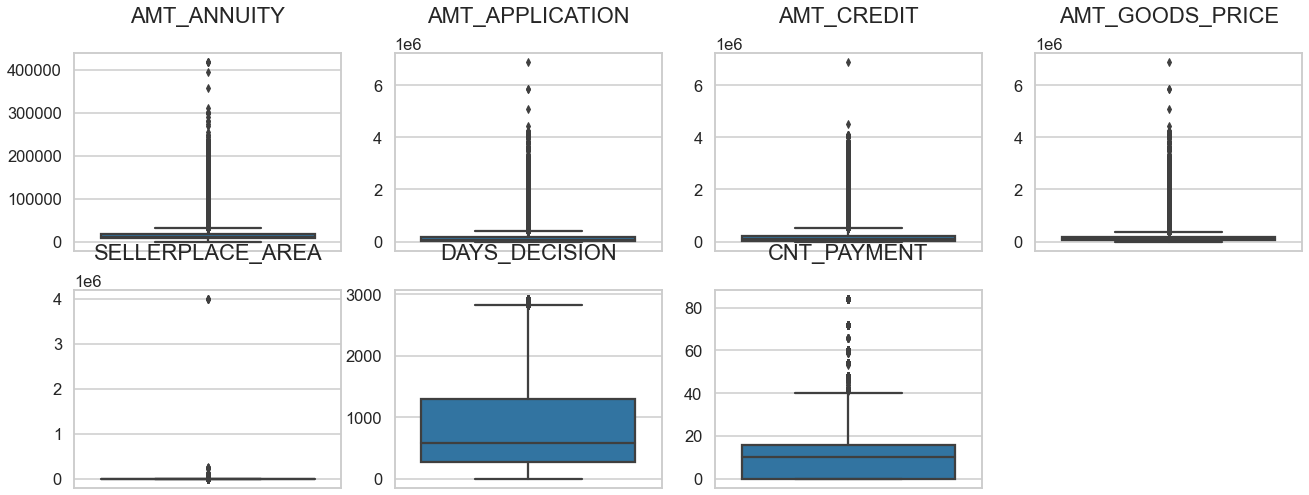

In [434]:
#Plotting box plot for the numericals in pervious data set.
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=prev_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=prev_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")


##### Inference: 
- AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
- CNT_PAYMENT has few outlier values.
- DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

## Merging Datasets

In [435]:
#merging application data and previous data set
loan_df = pd.merge(app_df, prev_df,on='SK_ID_CURR', how='inner')
loan_df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0      100002       1           Cash loans           M            N               Y             0          202500.0      406597.5        24700.5           351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                    2                           2                    WEDNESDAY                         10                           0                          0                           0                      0                      0                       0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0   
1      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School      0.622246      0.535276                       1.0                       0.0                       1.0                       0.0                  -828.0                0                1                0                0   
2      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School      0.622246      0.535276                       1.0                       0.0                       1.0                       0.0                  -828.0                0                1                0                0   
3      100003       0           Cash loans     

In [436]:
loan_df.shape

(1413701, 104)

In [437]:
loan_df.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)
loan_df.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0      100002       1           Cash loans           M            N               Y             0          202500.0      406597.5        24700.5           351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                    2                           2                    WEDNESDAY                         10                           0                          0                           0                      0                      0                       0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0   
1      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School      0.622246      0.535276                       1.0                       0.0                       1.0                       0.0                  -828.0                0                1                0                0   
3      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School      0.622246      0.535276                       1.0                       0.0                       1.0                       0.0                  -828.0                0                1                0                0   
2      100003       0           Cash loans     

In [438]:
# Analysis NAME_CASH_LOAN_PURPOSE for XNA and XAP
loan_df.loc[loan_df['NAME_CASH_LOAN_PURPOSE']=='XNA','NAME_CASH_LOAN_PURPOSE'] = np.NaN
loan_df.loc[loan_df['NAME_CASH_LOAN_PURPOSE']=='XAP','NAME_CASH_LOAN_PURPOSE'] = np.NaN 
loan_df.loc[loan_df['NAME_PORTFOLIO']=='XNA','NAME_PORTFOLIO'] = np.NaN 
loan_df.loc[loan_df['NAME_GOODS_CATEGORY']=='XNA','NAME_GOODS_CATEGORY'] = np.NaN

In [439]:
# Converting negative values to absolute values
loan_df['DAYS_BIRTH'] = abs(loan_df['DAYS_BIRTH'])
loan_df['DAYS_ID_PUBLISH'] = abs(loan_df['DAYS_ID_PUBLISH'])
loan_df['DAYS_ID_PUBLISH'] = abs(loan_df['DAYS_ID_PUBLISH'])
loan_df['DAYS_LAST_PHONE_CHANGE'] = abs(loan_df['DAYS_LAST_PHONE_CHANGE'])

## Univariate Analysis

In [440]:
# Splitting the merge data on the basis of Target

Non_defaulter = loan_df.loc[loan_df["TARGET"]==0]# Non Defaulters
Defaulter = loan_df.loc[loan_df["TARGET"]==1] # Defaulter

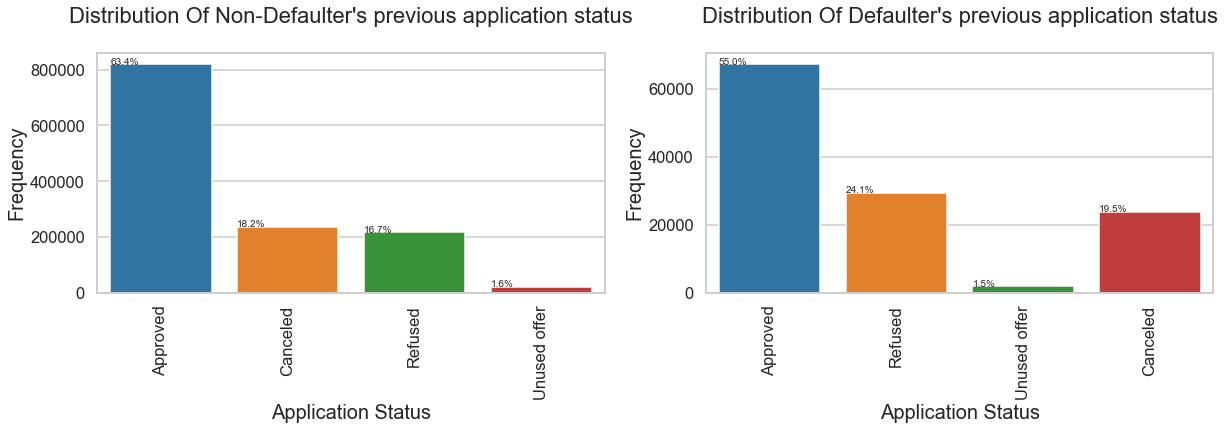

In [441]:
#Plotting "NAME_CONTRACT_STATUS" on the basis of 'TARGET' .
plt.figure(figsize=[20,15])
plt.subplot(3,2,1)
ax = sns.countplot(Non_defaulter["NAME_CONTRACT_STATUS"])
plt.xlabel("Application Status")
plt.ylabel("Frequency")
plt.title("Distribution Of Non-Defaulter's previous application status") 
plt.xticks(rotation=90)
total = len(Non_defaulter)
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))
        
plt.subplot(3,2,2)
ax = sns.countplot(Defaulter["NAME_CONTRACT_STATUS"])
plt.xlabel("Application Status")
plt.ylabel("Frequency")
plt.title("Distribution Of Defaulter's previous application status") 
plt.xticks(rotation=90)
total = len(Defaulter)
for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height()/total)
        x = i.get_x() 
        y = i.get_y() + i.get_height()
        ax.annotate(percentage, (x, y))
plt.show()

##### Inference:
- 18.2% of Non-defaulter's application has been cancelled,So bank should analysis these application again which can increase the bank's profitability.
- 16.7% of Non-defaulter's application were not accepted by the bank.
- There are few applicants in "Cancelled" and "Refused" Status who are Non-defaulters.Further analysis is required to come to conclusion.

In [442]:
# Analysis NAME_CASH_LOAN_PURPOSE for XNA and XAP
loan_df.loc[loan_df['NAME_CASH_LOAN_PURPOSE']=='XNA','NAME_CASH_LOAN_PURPOSE'] = np.NaN
loan_df.loc[loan_df['NAME_CASH_LOAN_PURPOSE']=='XAP','NAME_CASH_LOAN_PURPOSE'] = np.NaN 
loan_df.loc[loan_df['NAME_PORTFOLIO']=='XNA','NAME_PORTFOLIO'] = np.NaN 
loan_df.loc[loan_df['NAME_GOODS_CATEGORY']=='XNA','NAME_GOODS_CATEGORY'] = np.NaN

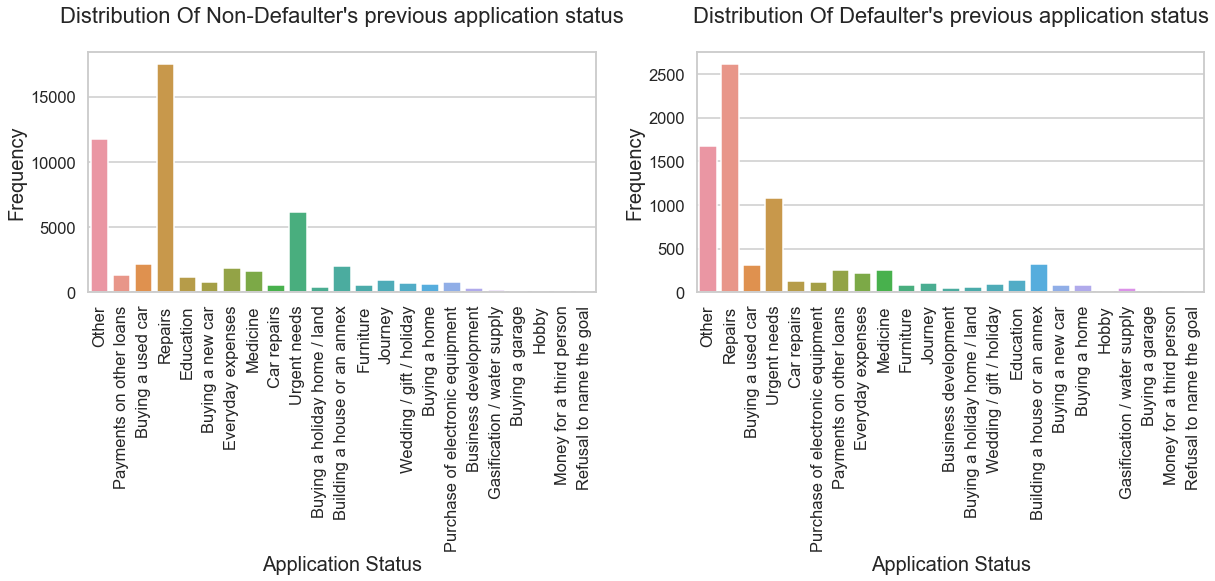

In [443]:
#Plotting "NAME_CASH_LOAN_PURPOSE" on the basis of 'TARGET' .
plt.figure(figsize=[20,15])
plt.subplot(3,2,1)
ax = sns.countplot(Non_defaulter["NAME_CASH_LOAN_PURPOSE"])
plt.xlabel("Application Status")
plt.ylabel("Frequency")
plt.title("Distribution Of Non-Defaulter's previous application status") 
plt.xticks(rotation=90)
        
plt.subplot(3,2,2)
ax = sns.countplot(Defaulter["NAME_CASH_LOAN_PURPOSE"])
plt.xlabel("Application Status")
plt.ylabel("Frequency")
plt.title("Distribution Of Defaulter's previous application status") 
plt.xticks(rotation=90)

plt.show()

##### Inference :
- Majority purpose of loan is for repairs which are both defaulters and Non-defaulters.
- Applicants taking loans for urgent needs are mostly defaulters.

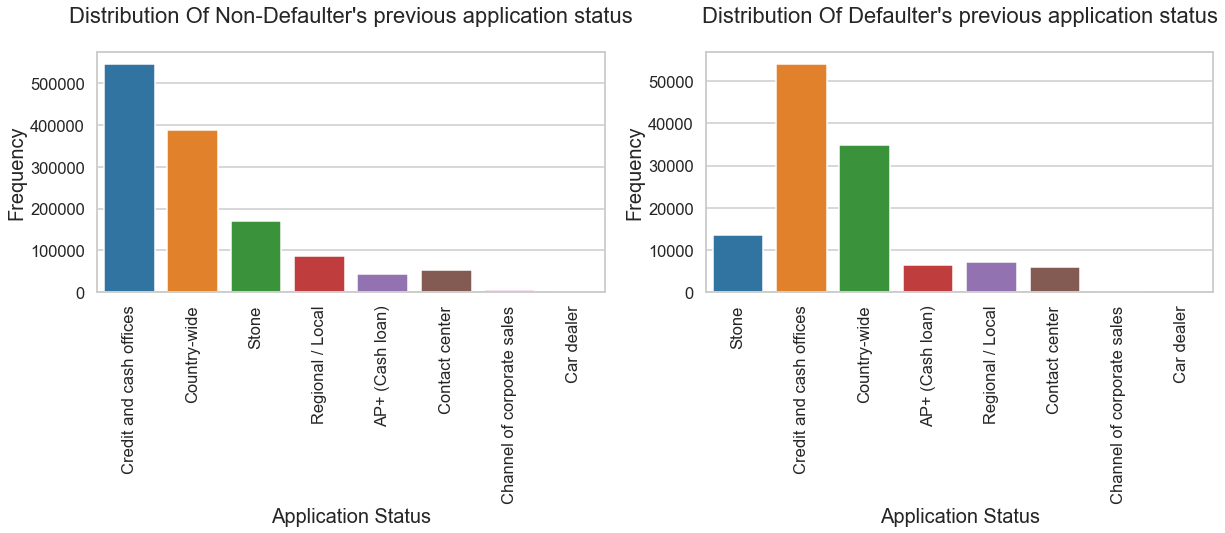

In [444]:
#Plotting "CHANNEL_TYPE" on the basis of 'TARGET' .
plt.figure(figsize=[20,15])
plt.subplot(3,2,1)
ax = sns.countplot(Non_defaulter["CHANNEL_TYPE"])
plt.xlabel("Application Status")
plt.ylabel("Frequency")
plt.title("Distribution Of Non-Defaulter's previous application status") 
plt.xticks(rotation=90)
        
plt.subplot(3,2,2)
ax = sns.countplot(Defaulter["CHANNEL_TYPE"])
plt.xlabel("Application Status")
plt.ylabel("Frequency")
plt.title("Distribution Of Defaulter's previous application status") 
plt.xticks(rotation=90)

plt.show()

##### Inference :
- Most Channel type is credit and cash offices.

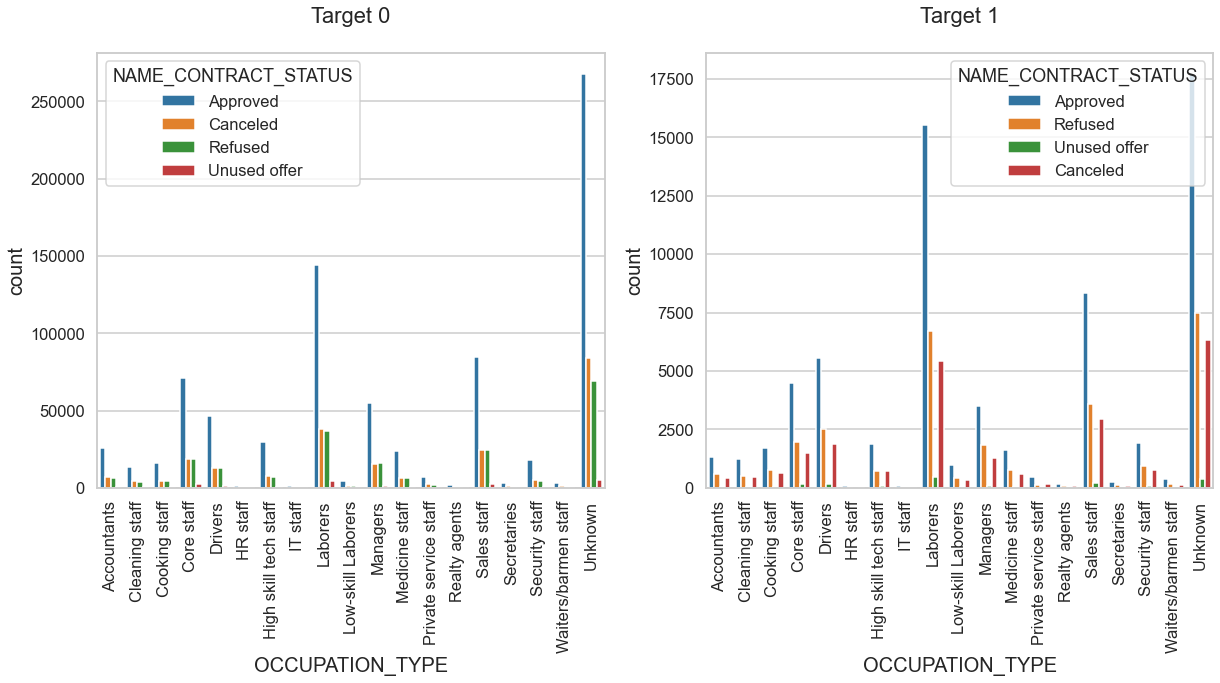

In [445]:
#Plotting "OCCUPATION_TYPE" on the basis of 'NAME_CONTRACT_STATUS' and 'TARGET'
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(x = "OCCUPATION_TYPE", hue= 'NAME_CONTRACT_STATUS', data = Non_defaulter)
plt.xticks(rotation='vertical')
plt.title("Distribution Of Non-Defaulter's previous application status") 
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "OCCUPATION_TYPE", hue= 'NAME_CONTRACT_STATUS', data =Defaulter)
plt.xticks(rotation='vertical')
plt.title("Distribution Of Defaulter's previous application status") 
plt.title("Target 1")
plt.show()

##### Inference :
- loan approved for Laborers and Sales staff 

## Bivariate Analysis

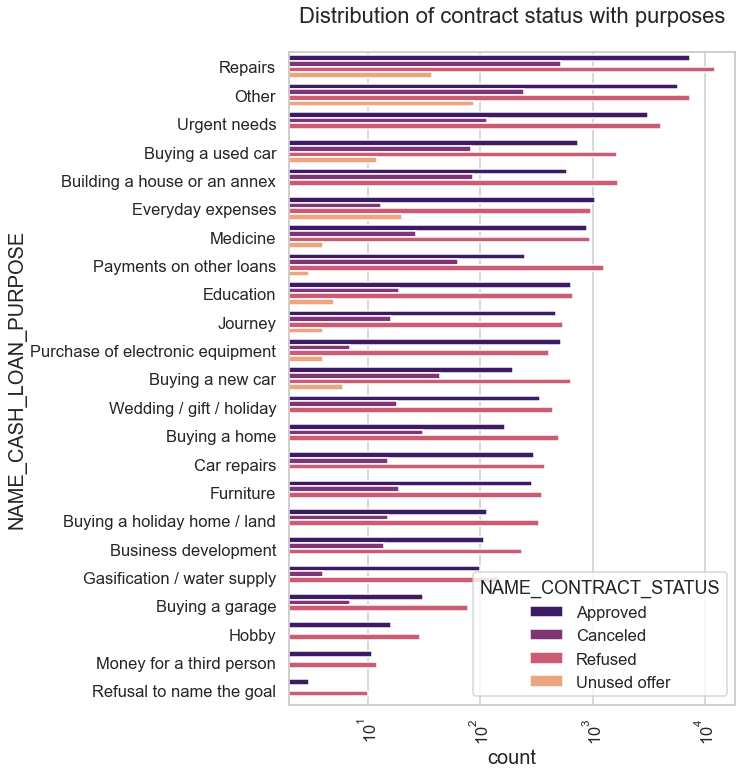

In [446]:
#Plotting "NAME_CASH_LOAN_PURPOSE" on the basis of 'TARGET' and 'NAME_CONTRACT_STATUS'.
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(8,12))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = loan_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=loan_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma',orient='v') 

##### Inference for above two graphs:
- A very high number application have been rejected by bank which has purpose as repair or other. 
- In case of "Hobby","Money for a third person","Refusal to name the goal" applicants are not cancelling the loan at any stage.
- There are high number of applications with purpose of loan as "Repair"
- In case of "Payment on other loan" applications bank is refusing the applications more then accepting it.

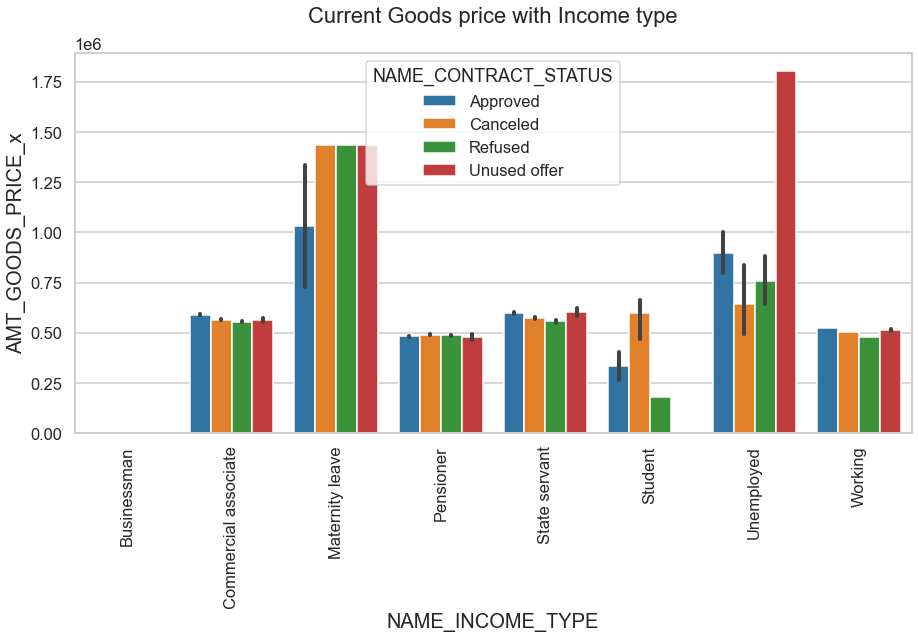

In [447]:
# Plotting current goods price with Income type for Target 1
plt.figure(figsize=(15,7))
sns.barplot(data =loan_df, x='NAME_INCOME_TYPE',hue='NAME_CONTRACT_STATUS',y='AMT_GOODS_PRICE_x')
plt.title('Current Goods price with Income type')
plt.xticks(rotation='vertical')
plt.show()

##### Inference:
- Since amount of the various good price are increase the applicant belongs to "Unemployed" Category are withdrawing their applicantion in different stages.
- Applicants belonging to "Maternity leave" category have a high probabilty of refusal by the bank or cancelled by the applicants as the interest rates offered to them are high.

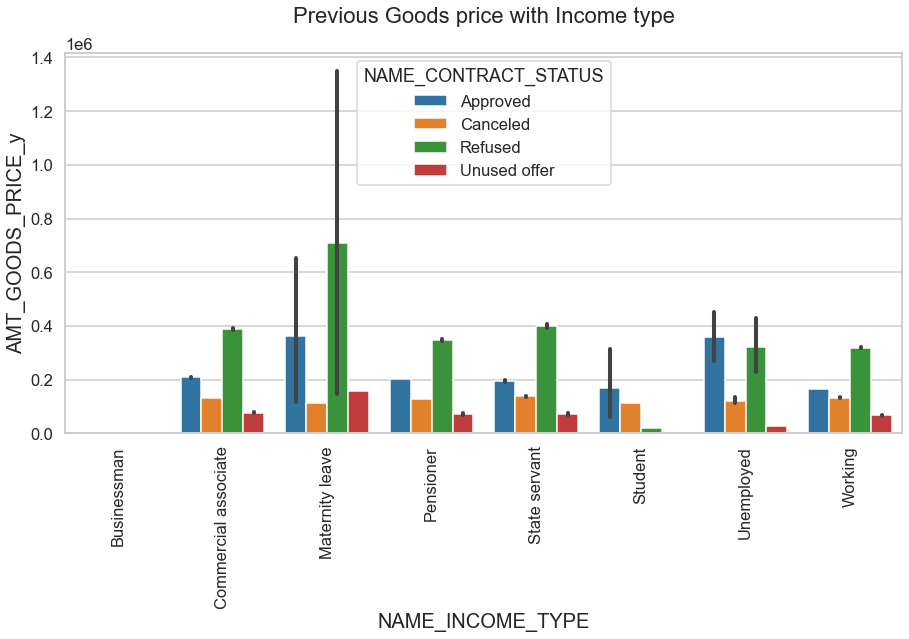

In [448]:
# Plotting current goods price with Income type for Target 0
plt.figure(figsize=(15,7))
sns.barplot(data =loan_df, x='NAME_INCOME_TYPE',hue='NAME_CONTRACT_STATUS',y='AMT_GOODS_PRICE_y')
plt.title('Previous Goods price with Income type')
plt.xticks(rotation='vertical')
plt.show()

##### Inference:
- From previous data it is evident that applicants belonging to "Maternity leave" category are being highly refused by the bank rather than approved.


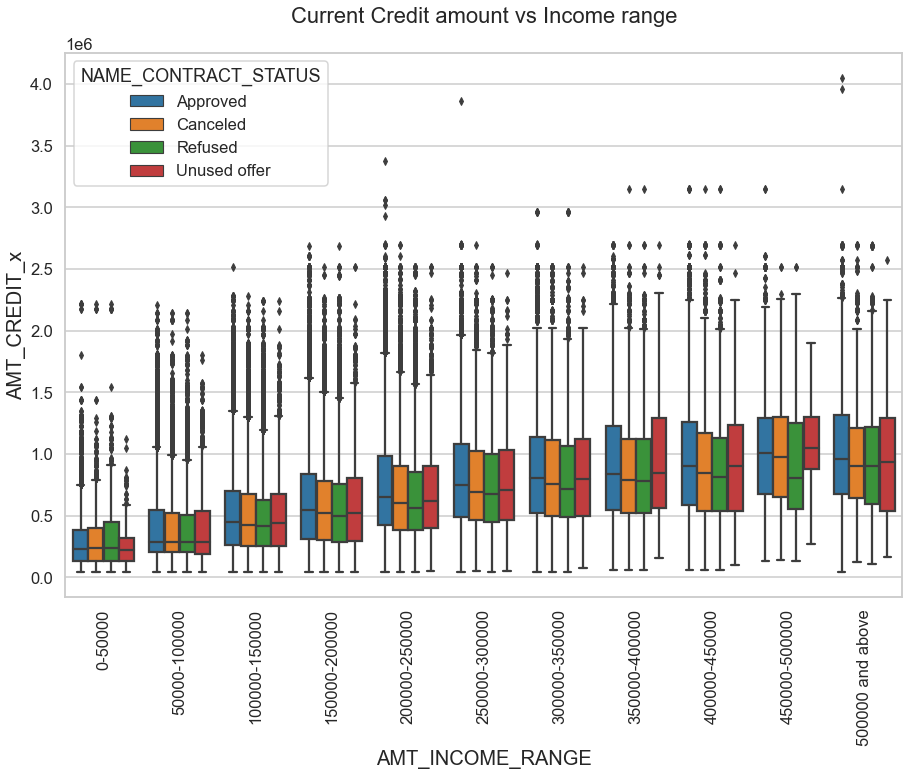

In [449]:
# Plotting Income range with Current credit amount for Target 1
plt.figure(figsize=(15,10))
sns.boxplot(data =loan_df, x='AMT_INCOME_RANGE', y='AMT_CREDIT_x', hue='NAME_CONTRACT_STATUS')
plt.title('Current Credit amount vs Income range')
plt.xticks(rotation='vertical')
plt.show()

#### Inference: 
- The Data consist of huge outliers.
- From the above graph we can say that major applicants are from income range 50k to 350k.

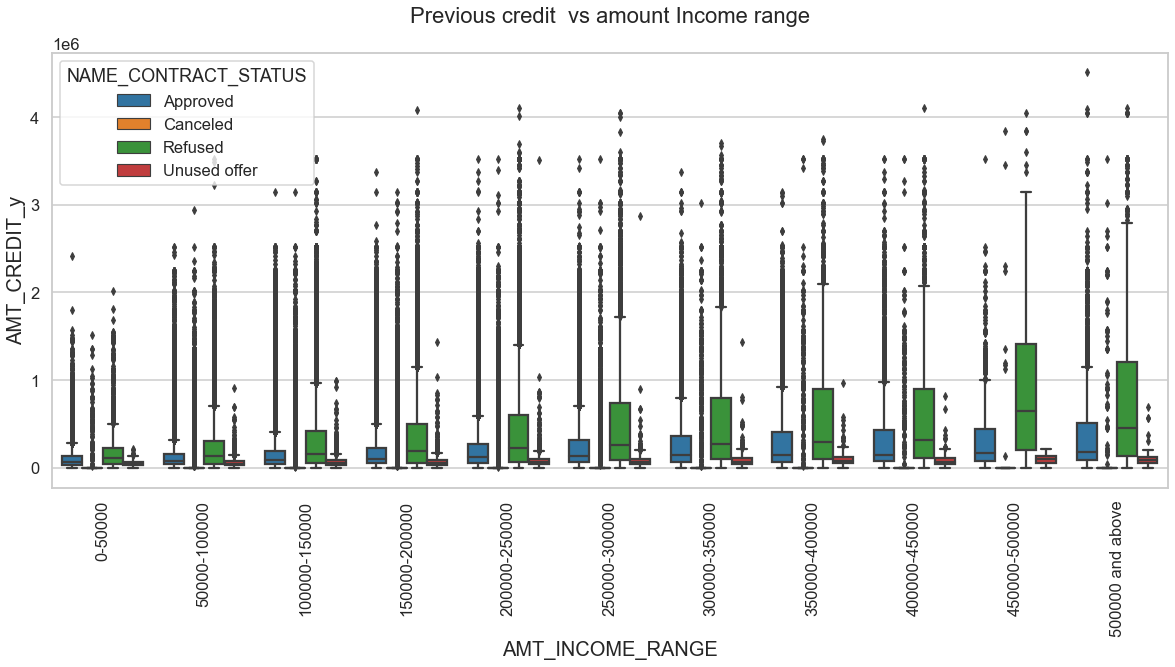

In [450]:
# Plotting Previous credit  with Income range for Target 1
plt.figure(figsize=(20,8))
sns.boxplot(data =loan_df, x='AMT_INCOME_RANGE', y='AMT_CREDIT_y', hue='NAME_CONTRACT_STATUS')
plt.title('Previous credit  vs amount Income range')
plt.xticks(rotation='vertical')
plt.show()

##### Inference:
- Applicant with income range of above 450k have a very high credit range and refusal rate is also high.
- Approval rate is much lower as compared to refusal rate by the bank.

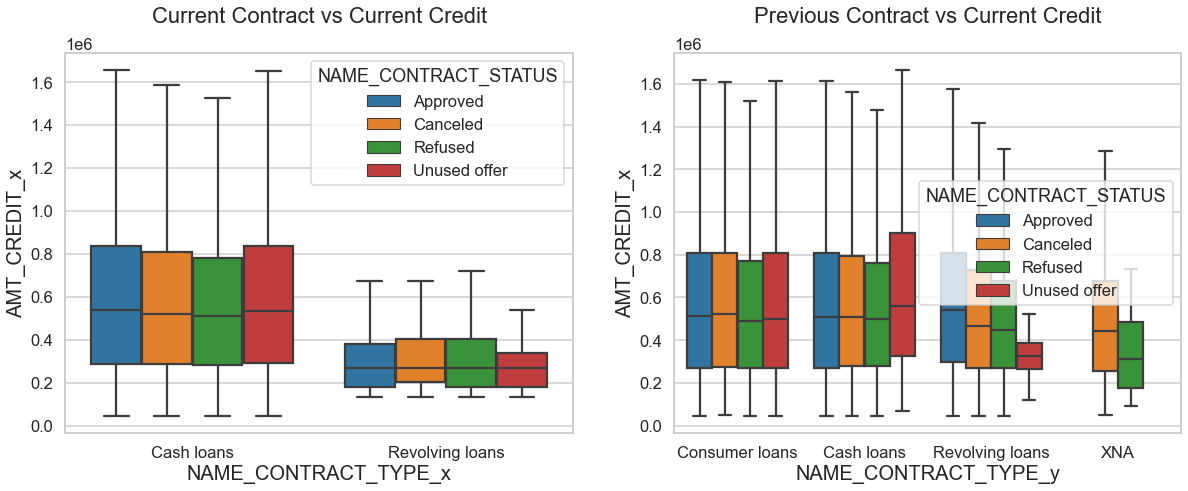

In [451]:
## Plotting current contract type with current credit for Target 1
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.boxplot(data =loan_df, x='NAME_CONTRACT_TYPE_x', y='AMT_CREDIT_x', hue ='NAME_CONTRACT_STATUS',showfliers=False)
plt.title('Current Contract vs Current Credit')

plt.subplot(1,2,2)
sns.boxplot(data =loan_df, x='NAME_CONTRACT_TYPE_y', y='AMT_CREDIT_x', hue ='NAME_CONTRACT_STATUS',showfliers=False)
plt.title('Previous Contract vs Current Credit')
plt.show()


#### Inference:
- From the above graph we can see that in previous data "Consumer loan" was there where as in current data there are only two type of loans available.
- In case of Current data amount credit in "Cash loan" is more than "Revolving loan".

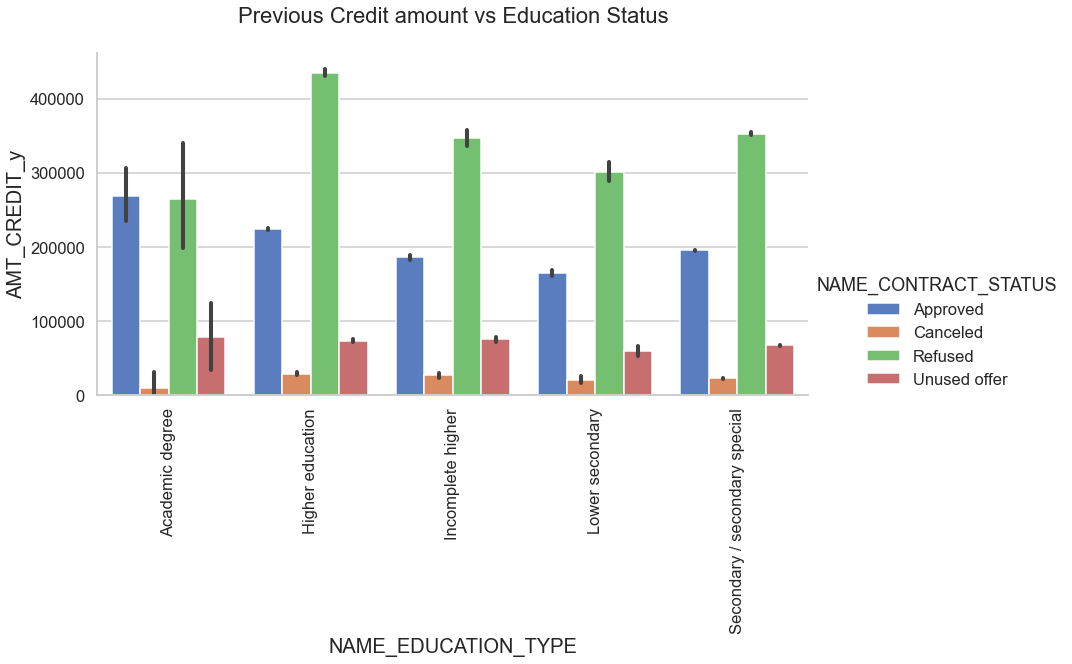

In [452]:
# Plotting Previous credit amount vs Education status

sns.catplot(data =loan_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT_y', hue ='NAME_CONTRACT_STATUS',height=6,aspect=2, kind="bar", palette="muted")
plt.title('Previous Credit amount vs Education Status')
plt.xticks(rotation=90)
plt.show()

##### Inference:
- Applicant with "Higher education" type has high credit amount and most of there applications are refused by the bank.
- Applicants with "Academic degree" type has almost null cancellation rate
- Applicants with "Academic degree" type has the most number of approved contract as compared to other segment.

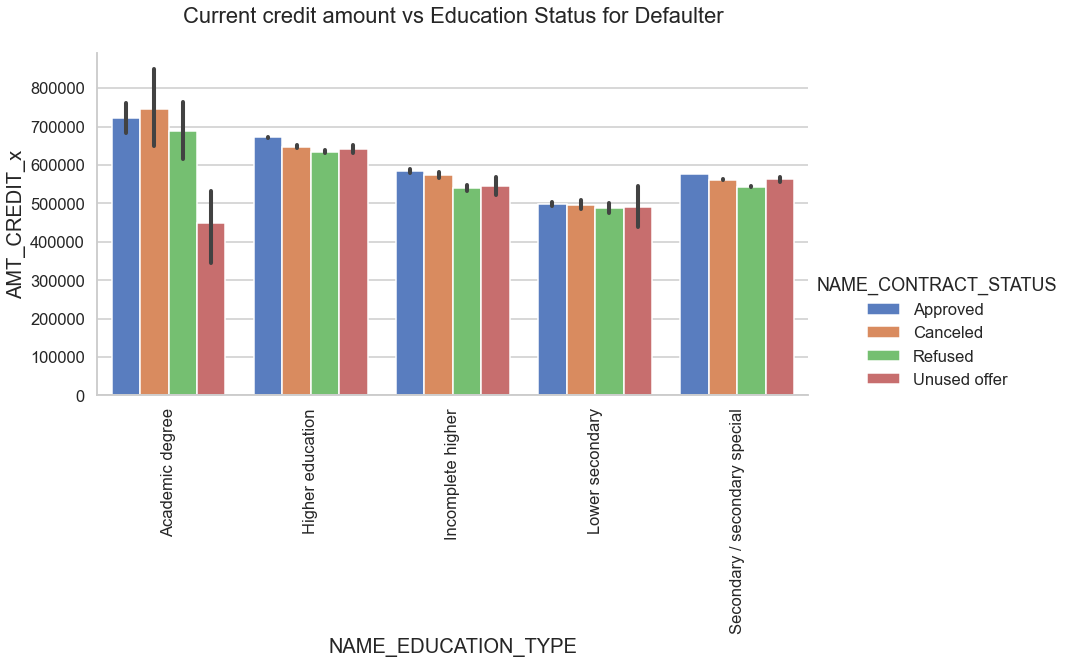

In [453]:
# Plotting  Current credit amount vs  Education Status

sns.catplot(data =loan_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT_x', hue ='NAME_CONTRACT_STATUS',height=6,aspect=2, kind="bar", palette="muted")
plt.title('Current credit amount vs Education Status for Defaulter')
plt.xticks(rotation=90)
plt.show()

##### Inference:
- Applicant with "Academic degree" type and high credit amount have highest rate of being accepted and rejected by the bank. 

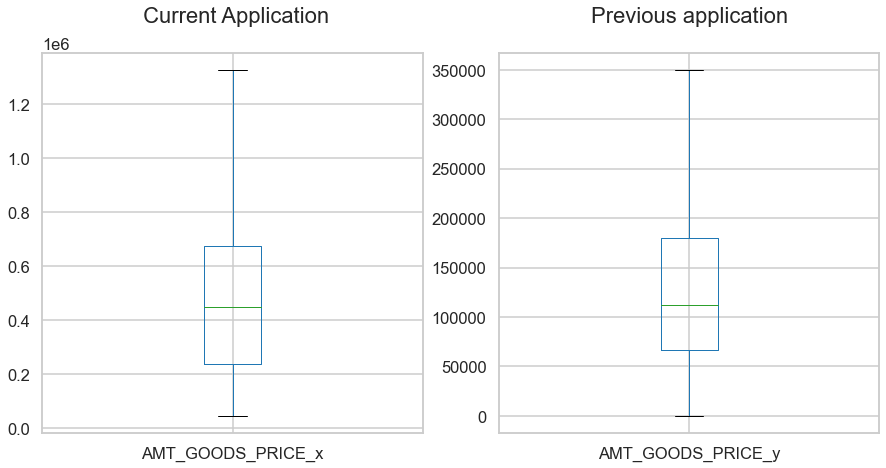

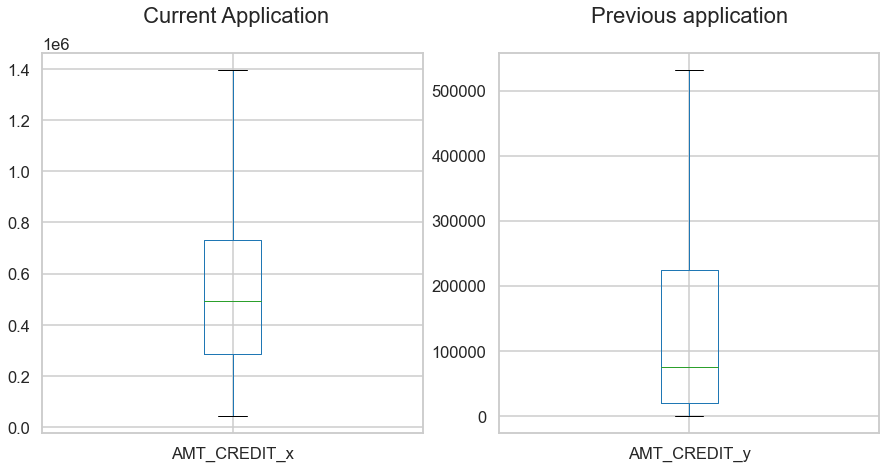

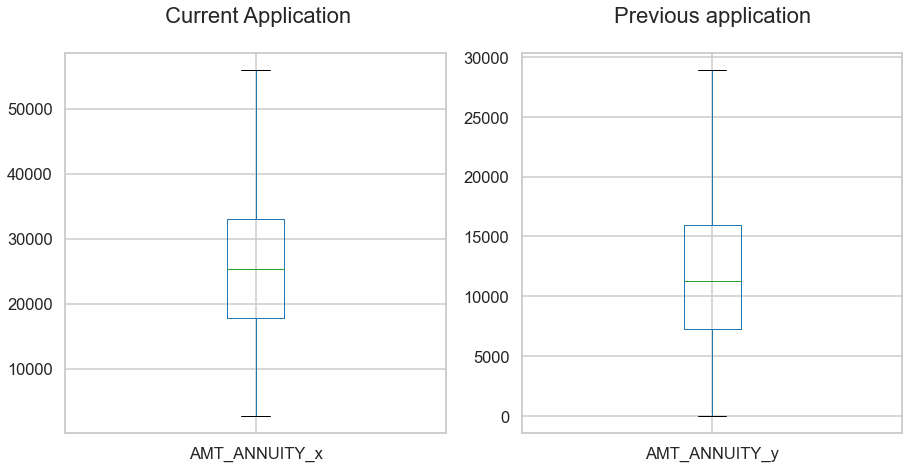

In [454]:
# Boxplot vizualisation on Amt fields ( x indicates current and y indicates previous)
col = ['AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y','AMT_CREDIT_x', 'AMT_CREDIT_y','AMT_ANNUITY_x','AMT_ANNUITY_y']
  # Plotting using box plot.. Removing the oulliers using showfliers command
i=0
for j in range(3):
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    Defaulter.boxplot(column=col[i],showfliers=False)
    plt.title(' Current Application')
    plt.subplot(1,2,2)
    Defaulter.boxplot(column=col[i+1],showfliers=False)
    plt.title('Previous application')
    i=i+2

##### While analysing the previoius application vs current application, we identified the below points why previously approved customers are now in defaulters list.
- Amount Good price spreaded for all the items in current application w.r.t previous application.
- Amount Credit and Amount Annuity also increased from previous to current application.


#### Case study final conclusion :
- AMT_CREDIT(x and y), AMT_INCOME_TOTAL, DAYS_BIRTH(Age group after imputing),NAME_CONTRACT_STATUS,NAME_INCOME_TYPE,Occupation and Organization types are the major fields for analysis.
- The imbalance ratio is too high i.e non defaulters data is 11.39 times more than defaulters.

- Majority of loan are taking from age group 30 to 40.In this range applicants with "Secondary" education has more number of defaulters.
- Most of the applicants for loan have income range between 50k to 2.5 lakhs.
- Highest defaulter are in range 100k to 150k and lowest defaulter are above 4.5lakhs category.
- People are preferring more cash loans than revolving.
- Defaulters are mostly have secondary/special education only.
- Lowest number of applicants are from Academic degree and they expect more credit amount,although they are Non-defaulters.
- Most of people who are taking loans has either 0 or 1 children and they are live in House/Apt or with parents.
- Married people are taking more loans.
- Females are more tend to take loans. 
- Most of the loans are taking for repair works.
- Applicants taking loans for urgent needs are mostly defaulters.
- Lowest number of applicant are from Academic degree that to they are Non-defaulters.

##### Suggestion:
- There are few applicants in "Cancelled" and "Refused" Status who are Non-defaulters. Bank should focus and negotiate term with these applicants in future which increase the revenue for the bank.